In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
pfolio_assets = [
    "AMZN",
    "PFE",
    "AMD",
    "HAL",
    "PG",
    "COF",    
]


In [3]:
# Portfolio Stock Selection
pfolio_assets = [
    "NLY", 
    "T", 
    "AMZN", 
    "PG", 
    "BAC", 
    "PFE", 
    "FCX", 
    "MSFT", 
    "GM", 
    "QCOM",
]

print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 10


In [4]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: NLY
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High      Low  Close      Volume
Date                                                
2014-01-02   9.97  10.14   9.9700  10.01  10863700.0
2014-01-03  10.05  10.10   9.9200  10.00   9061700.0
2014-01-06  10.03  10.13  10.0300  10.11   9182200.0
2014-01-07  10.10  10.28  10.0900  10.25  15784100.0
2014-01-08  10.21  10.23  10.0600  10.15  11104000.0
2014-01-09  10.18  10.19   9.9701  10.08  11576700.0
2014-01-10  10.27  10.27  10.1000  10.24  16109100.0
2014-01-13  10.25  10.45  10.2000  10.39  15883400.0
2014-01-14  10.36  10.38  10.1700  10.19   8824300.0
2014-01-15  10.16  10.25  10.1400  10.14   6978500.0 

---------------------------------------

In [5]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: T
<Quandl API Call> [2] Stock Symbol: AMZN
<Quandl API Call> [3] Stock Symbol: PG
<Quandl API Call> [4] Stock Symbol: BAC
<Quandl API Call> [5] Stock Symbol: PFE
<Quandl API Call> [6] Stock Symbol: FCX
<Quandl API Call> [7] Stock Symbol: MSFT
<Quandl API Call> [8] Stock Symbol: GM
<Quandl API Call> [9] Stock Symbol: QCOM

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [6]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,NLY,T,AMZN,PG,BAC,PFE,FCX,MSFT,GM,QCOM
Date,,,,,,,,,,
2014-01-02,10.01,34.95,397.97,80.54,16.10,30.46,37.63,37.160,40.95,73.32
2014-01-03,10.00,34.80,396.44,80.45,16.41,30.52,37.32,36.910,39.57,72.89
2014-01-06,10.11,34.96,393.63,80.64,16.66,30.55,37.02,36.130,40.40,72.70
2014-01-07,10.25,34.95,398.03,81.42,16.50,30.74,36.66,36.410,40.20,73.24
2014-01-08,10.15,34.24,401.92,80.24,16.58,30.95,36.20,35.760,40.42,73.68
2014-01-09,10.08,33.54,401.01,80.42,16.83,30.93,35.71,35.530,40.49,73.91
2014-01-10,10.24,33.62,397.66,80.30,16.77,30.69,36.17,36.040,40.03,73.87
2014-01-13,10.39,33.30,390.98,80.01,16.43,30.54,35.63,34.980,39.58,73.22
2014-01-14,10.19,33.48,397.54,80.87,16.77,31.00,36.12,35.780,40.02,73.39


In [7]:
# View DataFrame -- Data Completeness
portfolio.count()

NLY     1064
T       1064
AMZN    1064
PG      1064
BAC     1064
PFE     1064
FCX     1064
MSFT    1064
GM      1064
QCOM    1064
dtype: int64

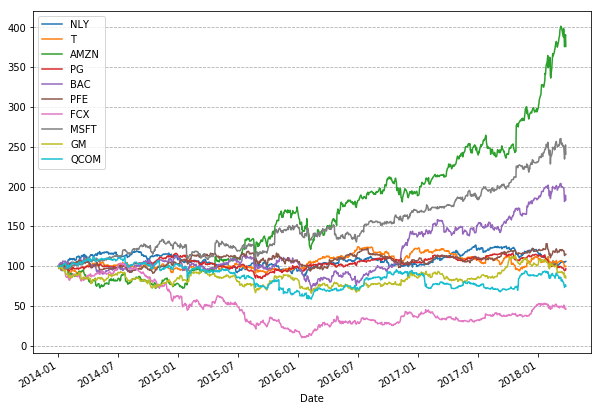

In [8]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = (portfolio/portfolio.iloc[0] * 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")

In [9]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,NLY,T,AMZN,PG,BAC,PFE,FCX,MSFT,GM,QCOM
Date,,,,,,,,,,
2014-01-03,-0.001000,-0.004301,-0.003852,-0.001118,0.019072,0.001968,-0.008272,-0.006750,-0.034281,-0.005882
2014-01-06,0.010940,0.004587,-0.007113,0.002359,0.015120,0.000982,-0.008071,-0.021359,0.020759,-0.002610
2014-01-07,0.013753,-0.000286,0.011116,0.009626,-0.009650,0.006200,-0.009772,0.007720,-0.004963,0.007400
2014-01-08,-0.009804,-0.020524,0.009726,-0.014599,0.004837,0.006808,-0.012627,-0.018014,0.005458,0.005990
2014-01-09,-0.006920,-0.020656,-0.002267,0.002241,0.014966,-0.000646,-0.013628,-0.006453,0.001730,0.003117
2014-01-10,0.015748,0.002382,-0.008389,-0.001493,-0.003571,-0.007790,0.012799,0.014252,-0.011426,-0.000541
2014-01-13,0.014542,-0.009564,-0.016941,-0.003618,-0.020483,-0.004900,-0.015042,-0.029853,-0.011305,-0.008838
2014-01-14,-0.019437,0.005391,0.016639,0.010691,0.020483,0.014950,0.013659,0.022613,0.011055,0.002319
2014-01-15,-0.004919,0.009217,-0.004210,-0.000990,0.022407,0.005790,0.013475,0.027021,-0.016121,0.015146


In [10]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

NLY     0.013469
T      -0.000337
AMZN    0.311589
PG     -0.008171
BAC     0.142580
PFE     0.032742
FCX    -0.183577
MSFT    0.206649
GM     -0.037800
QCOM   -0.068300
dtype: float64

In [11]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,NLY,T,AMZN,PG,BAC,PFE,FCX,MSFT,GM,QCOM
NLY,0.025292,0.005995,0.003390,0.005719,0.000959,0.003649,0.013316,0.006297,0.004394,0.005059
T,0.005995,0.026226,0.008042,0.008431,0.010087,0.008259,0.020425,0.011035,0.011011,0.009897
AMZN,0.003390,0.008042,0.086065,0.008945,0.022924,0.012405,0.022321,0.029250,0.017395,0.016215
PG,0.005719,0.008431,0.008945,0.019098,0.008570,0.007854,0.015576,0.012372,0.008066,0.008900
BAC,0.000959,0.010087,0.022924,0.008570,0.065663,0.017315,0.052324,0.023004,0.028767,0.024724
PFE,0.003649,0.008259,0.012405,0.007854,0.017315,0.030334,0.022377,0.014224,0.014193,0.014273
FCX,0.013316,0.020425,0.022321,0.015576,0.052324,0.022377,0.329113,0.032286,0.044852,0.041966
MSFT,0.006297,0.011035,0.029250,0.012372,0.023004,0.014224,0.032286,0.049413,0.017234,0.021710
GM,0.004394,0.011011,0.017395,0.008066,0.028767,0.014193,0.044852,0.017234,0.058584,0.020895
QCOM,0.005059,0.009897,0.016215,0.008900,0.024724,0.014273,0.041966,0.021710,0.020895,0.076881


In [12]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,NLY,T,AMZN,PG,BAC,PFE,FCX,MSFT,GM,QCOM
NLY,1.000000,0.232781,0.072666,0.260206,0.023522,0.131743,0.145948,0.178113,0.114146,0.114735
T,0.232781,1.000000,0.169281,0.376704,0.243083,0.292822,0.219847,0.306551,0.280921,0.220418
AMZN,0.072666,0.169281,1.000000,0.220633,0.304941,0.242780,0.132624,0.448530,0.244970,0.199338
PG,0.260206,0.376704,0.220633,1.000000,0.242012,0.326310,0.196471,0.402736,0.241144,0.232263
BAC,0.023522,0.243083,0.304941,0.242012,1.000000,0.387966,0.355937,0.403857,0.463815,0.347974
PFE,0.131743,0.292822,0.242780,0.326310,0.387966,1.000000,0.223957,0.367412,0.336691,0.295554
FCX,0.145948,0.219847,0.132624,0.196471,0.355937,0.223957,1.000000,0.253179,0.323011,0.263823
MSFT,0.178113,0.306551,0.448530,0.402736,0.403857,0.367412,0.253179,1.000000,0.320315,0.352237
GM,0.114146,0.280921,0.244970,0.241144,0.463815,0.336691,0.323011,0.320315,1.000000,0.311352
QCOM,0.114735,0.220418,0.199338,0.232263,0.347974,0.295554,0.263823,0.352237,0.311352,1.000000


In [13]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

10

In [14]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 5000
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'NLY': 0.115, 'T': 0.0264, 'AMZN': 0.019, 'PG': 0.0456, 'BAC': 0.1369, 'PFE': 0.1539, 'FCX': 0.1844, 'MSFT': 0.0435, 'GM': 0.0869, 'QCOM': 0.1884, 'RTN': -0.0094, 'VOL': 0.185, 'Sharpe': -0.5803} 


 {'NLY': 0.0871, 'T': 0.1517, 'AMZN': 0.2021, 'PG': 0.2299, 'BAC': 0.0994, 'PFE': 0.0083, 'FCX': 0.051, 'MSFT': 0.0147, 'GM': 0.1305, 'QCOM': 0.0253, 'RTN': 0.0637, 'VOL': 0.1358, 'Sharpe': -0.2528} 


 {'NLY': 0.0063, 'T': 0.1256, 'AMZN': 0.1258, 'PG': 0.0698, 'BAC': 0.1078, 'PFE': 0.1704, 'FCX': 0.1687, 'MSFT': 0.1383, 'GM': 0.0549, 'QCOM': 0.0323, 'RTN': 0.0529, 'VOL': 0.1755, 'Sharpe': -0.2568} 


 {'NLY': 0.1037, 'T': 0.075, 'AMZN': 0.0379, 'PG': 0.0157, 'BAC': 0.0639, 'PFE': 0.1573, 'FCX': 0.12, 'MSFT': 0.1431, 'GM': 0.1208, 'QCOM': 0.1627, 'RTN': 0.0192, 'VOL': 0.1607, 'Sharpe': -0.4904} 


 {'NLY': 0.1942, 'T': 0.0247, 'AMZN': 0.1176, 'PG': 0.1345, 'BAC': 0.1005, 'PFE': 0.0684, 'FCX': 0.0278, 'MSFT': 0.1508, 'GM': 0.0538, 'QCOM': 0.1278, 'RTN': 0.07, 'VOL': 0.1317, 'Sharpe': -0.2


 {'NLY': 0.0926, 'T': 0.0887, 'AMZN': 0.1407, 'PG': 0.1816, 'BAC': 0.0119, 'PFE': 0.108, 'FCX': 0.1193, 'MSFT': 0.1517, 'GM': 0.0313, 'QCOM': 0.0742, 'RTN': 0.052, 'VOL': 0.1488, 'Sharpe': -0.309} 


 {'NLY': 0.0654, 'T': 0.0723, 'AMZN': 0.0042, 'PG': 0.1105, 'BAC': 0.1124, 'PFE': 0.192, 'FCX': 0.1462, 'MSFT': 0.1703, 'GM': 0.0302, 'QCOM': 0.0966, 'RTN': 0.0242, 'VOL': 0.1639, 'Sharpe': -0.4503} 


 {'NLY': 0.0289, 'T': 0.0992, 'AMZN': 0.127, 'PG': 0.0826, 'BAC': 0.0594, 'PFE': 0.1047, 'FCX': 0.1218, 'MSFT': 0.1282, 'GM': 0.0893, 'QCOM': 0.1588, 'RTN': 0.041, 'VOL': 0.1633, 'Sharpe': -0.3488} 


 {'NLY': 0.108, 'T': 0.1473, 'AMZN': 0.2456, 'PG': 0.1653, 'BAC': 0.0911, 'PFE': 0.049, 'FCX': 0.0625, 'MSFT': 0.0479, 'GM': 0.0346, 'QCOM': 0.0488, 'RTN': 0.085, 'VOL': 0.1406, 'Sharpe': -0.0927} 


 {'NLY': 0.155, 'T': 0.1186, 'AMZN': 0.0314, 'PG': 0.0729, 'BAC': 0.0692, 'PFE': 0.1113, 'FCX': 0.0346, 'MSFT': 0.1567, 'GM': 0.1438, 'QCOM': 0.1064, 'RTN': 0.0381, 'VOL': 0.1306, 'Sharpe': -0.459


 {'NLY': 0.0592, 'T': 0.0042, 'AMZN': 0.1152, 'PG': 0.1064, 'BAC': 0.0758, 'PFE': 0.1162, 'FCX': 0.1484, 'MSFT': 0.1093, 'GM': 0.1413, 'QCOM': 0.1239, 'RTN': 0.032, 'VOL': 0.1718, 'Sharpe': -0.3843} 


 {'NLY': 0.0448, 'T': 0.1477, 'AMZN': 0.143, 'PG': 0.0593, 'BAC': 0.0055, 'PFE': 0.1412, 'FCX': 0.1485, 'MSFT': 0.1313, 'GM': 0.0945, 'QCOM': 0.0841, 'RTN': 0.0406, 'VOL': 0.1645, 'Sharpe': -0.349} 


 {'NLY': 0.0364, 'T': 0.004, 'AMZN': 0.106, 'PG': 0.148, 'BAC': 0.1094, 'PFE': 0.1756, 'FCX': 0.0894, 'MSFT': 0.1055, 'GM': 0.1762, 'QCOM': 0.0495, 'RTN': 0.049, 'VOL': 0.1535, 'Sharpe': -0.3192} 


 {'NLY': 0.1109, 'T': 0.2065, 'AMZN': 0.0545, 'PG': 0.0283, 'BAC': 0.1531, 'PFE': 0.0454, 'FCX': 0.0857, 'MSFT': 0.1469, 'GM': 0.1286, 'QCOM': 0.0401, 'RTN': 0.0485, 'VOL': 0.1477, 'Sharpe': -0.3348} 


 {'NLY': 0.0329, 'T': 0.0088, 'AMZN': 0.0294, 'PG': 0.1564, 'BAC': 0.1845, 'PFE': 0.1234, 'FCX': 0.1033, 'MSFT': 0.138, 'GM': 0.0929, 'QCOM': 0.1304, 'RTN': 0.0358, 'VOL': 0.1616, 'Sharpe': -0.3


 {'NLY': 0.0119, 'T': 0.0803, 'AMZN': 0.078, 'PG': 0.0952, 'BAC': 0.1749, 'PFE': 0.0187, 'FCX': 0.1575, 'MSFT': 0.1503, 'GM': 0.0579, 'QCOM': 0.1752, 'RTN': 0.0372, 'VOL': 0.1841, 'Sharpe': -0.3303} 


 {'NLY': 0.025, 'T': 0.1157, 'AMZN': 0.022, 'PG': 0.1826, 'BAC': 0.1229, 'PFE': 0.2115, 'FCX': 0.0811, 'MSFT': 0.0154, 'GM': 0.0291, 'QCOM': 0.1947, 'RTN': 0.004, 'VOL': 0.1458, 'Sharpe': -0.6447} 


 {'NLY': 0.1464, 'T': 0.1068, 'AMZN': 0.0324, 'PG': 0.1418, 'BAC': 0.0735, 'PFE': 0.1381, 'FCX': 0.086, 'MSFT': 0.036, 'GM': 0.1126, 'QCOM': 0.1265, 'RTN': 0.0046, 'VOL': 0.1367, 'Sharpe': -0.6827} 


 {'NLY': 0.1307, 'T': 0.023, 'AMZN': 0.1519, 'PG': 0.03, 'BAC': 0.0901, 'PFE': 0.0872, 'FCX': 0.1293, 'MSFT': 0.1252, 'GM': 0.0822, 'QCOM': 0.1504, 'RTN': 0.0533, 'VOL': 0.1666, 'Sharpe': -0.2682} 


 {'NLY': 0.0788, 'T': 0.075, 'AMZN': 0.0173, 'PG': 0.1026, 'BAC': 0.1366, 'PFE': 0.1692, 'FCX': 0.0661, 'MSFT': 0.0939, 'GM': 0.1148, 'QCOM': 0.146, 'RTN': 0.0235, 'VOL': 0.1445, 'Sharpe': -0.5154


 {'NLY': 0.1774, 'T': 0.0184, 'AMZN': 0.0141, 'PG': 0.0163, 'BAC': 0.0473, 'PFE': 0.0643, 'FCX': 0.0931, 'MSFT': 0.0303, 'GM': 0.2903, 'QCOM': 0.2487, 'RTN': -0.0233, 'VOL': 0.1666, 'Sharpe': -0.7281} 


 {'NLY': 0.0914, 'T': 0.1384, 'AMZN': 0.1431, 'PG': 0.1278, 'BAC': 0.1558, 'PFE': 0.0382, 'FCX': 0.0563, 'MSFT': 0.0823, 'GM': 0.1478, 'QCOM': 0.0189, 'RTN': 0.068, 'VOL': 0.1415, 'Sharpe': -0.2121} 


 {'NLY': 0.0871, 'T': 0.0397, 'AMZN': 0.2334, 'PG': 0.0278, 'BAC': 0.017, 'PFE': 0.134, 'FCX': 0.0204, 'MSFT': 0.1702, 'GM': 0.0289, 'QCOM': 0.2413, 'RTN': 0.0943, 'VOL': 0.1557, 'Sharpe': -0.0235} 


 {'NLY': 0.2656, 'T': 0.0317, 'AMZN': 0.0142, 'PG': 0.1389, 'BAC': 0.0447, 'PFE': 0.0067, 'FCX': 0.1086, 'MSFT': 0.148, 'GM': 0.0507, 'QCOM': 0.1909, 'RTN': 0.0091, 'VOL': 0.1481, 'Sharpe': -0.6} 


 {'NLY': 0.0699, 'T': 0.1537, 'AMZN': 0.1618, 'PG': 0.1857, 'BAC': 0.1284, 'PFE': 0.0903, 'FCX': 0.0483, 'MSFT': 0.0173, 'GM': 0.0037, 'QCOM': 0.1409, 'RTN': 0.056, 'VOL': 0.1354, 'Sharpe': -0.


 {'NLY': 0.1118, 'T': 0.1071, 'AMZN': 0.014, 'PG': 0.1195, 'BAC': 0.1476, 'PFE': 0.0408, 'FCX': 0.0961, 'MSFT': 0.0241, 'GM': 0.1415, 'QCOM': 0.1976, 'RTN': -0.0043, 'VOL': 0.1548, 'Sharpe': -0.6604} 


 {'NLY': 0.0613, 'T': 0.0479, 'AMZN': 0.0205, 'PG': 0.0693, 'BAC': 0.1707, 'PFE': 0.1578, 'FCX': 0.0787, 'MSFT': 0.175, 'GM': 0.0595, 'QCOM': 0.1594, 'RTN': 0.0447, 'VOL': 0.1557, 'Sharpe': -0.3422} 


 {'NLY': 0.0819, 'T': 0.0999, 'AMZN': 0.1441, 'PG': 0.0251, 'BAC': 0.0949, 'PFE': 0.0846, 'FCX': 0.0652, 'MSFT': 0.1587, 'GM': 0.0389, 'QCOM': 0.2068, 'RTN': 0.0673, 'VOL': 0.1543, 'Sharpe': -0.199} 


 {'NLY': 0.0503, 'T': 0.0915, 'AMZN': 0.1407, 'PG': 0.054, 'BAC': 0.0986, 'PFE': 0.1303, 'FCX': 0.0645, 'MSFT': 0.1133, 'GM': 0.148, 'QCOM': 0.1088, 'RTN': 0.0609, 'VOL': 0.1498, 'Sharpe': -0.2477} 


 {'NLY': 0.0523, 'T': 0.0535, 'AMZN': 0.0395, 'PG': 0.1711, 'BAC': 0.1293, 'PFE': 0.1161, 'FCX': 0.1699, 'MSFT': 0.067, 'GM': 0.086, 'QCOM': 0.1151, 'RTN': 0.0054, 'VOL': 0.1728, 'Sharpe': -0

 {'NLY': 0.0235, 'T': 0.1509, 'AMZN': 0.1195, 'PG': 0.0994, 'BAC': 0.0305, 'PFE': 0.1287, 'FCX': 0.0968, 'MSFT': 0.094, 'GM': 0.1547, 'QCOM': 0.1019, 'RTN': 0.0341, 'VOL': 0.1504, 'Sharpe': -0.4248} 


 {'NLY': 0.0273, 'T': 0.095, 'AMZN': 0.0557, 'PG': 0.1103, 'BAC': 0.1432, 'PFE': 0.1082, 'FCX': 0.1813, 'MSFT': 0.1667, 'GM': 0.0866, 'QCOM': 0.0258, 'RTN': 0.0369, 'VOL': 0.1804, 'Sharpe': -0.3389} 


 {'NLY': 0.0325, 'T': 0.1304, 'AMZN': 0.0825, 'PG': 0.0027, 'BAC': 0.0917, 'PFE': 0.0005, 'FCX': 0.1354, 'MSFT': 0.1333, 'GM': 0.1753, 'QCOM': 0.2156, 'RTN': 0.0205, 'VOL': 0.1806, 'Sharpe': -0.429} 


 {'NLY': 0.122, 'T': 0.0612, 'AMZN': 0.1564, 'PG': 0.1556, 'BAC': 0.0535, 'PFE': 0.0871, 'FCX': 0.112, 'MSFT': 0.0898, 'GM': 0.1069, 'QCOM': 0.0557, 'RTN': 0.0497, 'VOL': 0.1485, 'Sharpe': -0.3251} 


 {'NLY': 0.0994, 'T': 0.1371, 'AMZN': 0.0203, 'PG': 0.0808, 'BAC': 0.1195, 'PFE': 0.0945, 'FCX': 0.1359, 'MSFT': 0.1258, 'GM': 0.11, 'QCOM': 0.0766, 'RTN': 0.0188, 'VOL': 0.1592, 'Sharpe': -0.4


 {'NLY': 0.0731, 'T': 0.0035, 'AMZN': 0.0244, 'PG': 0.1312, 'BAC': 0.2767, 'PFE': 0.2067, 'FCX': 0.0218, 'MSFT': 0.0056, 'GM': 0.0677, 'QCOM': 0.1891, 'RTN': 0.0354, 'VOL': 0.1491, 'Sharpe': -0.4196} 


 {'NLY': 0.1649, 'T': 0.0492, 'AMZN': 0.0052, 'PG': 0.1771, 'BAC': 0.0705, 'PFE': 0.1099, 'FCX': 0.0029, 'MSFT': 0.1558, 'GM': 0.1386, 'QCOM': 0.1259, 'RTN': 0.0339, 'VOL': 0.124, 'Sharpe': -0.5171} 


 {'NLY': 0.0923, 'T': 0.0017, 'AMZN': 0.0018, 'PG': 0.1839, 'BAC': 0.2109, 'PFE': 0.1913, 'FCX': 0.1577, 'MSFT': 0.0005, 'GM': 0.0837, 'QCOM': 0.0763, 'RTN': -0.0006, 'VOL': 0.1701, 'Sharpe': -0.5797} 


 {'NLY': 0.1227, 'T': 0.0922, 'AMZN': 0.097, 'PG': 0.1005, 'BAC': 0.1249, 'PFE': 0.1192, 'FCX': 0.1258, 'MSFT': 0.0294, 'GM': 0.1154, 'QCOM': 0.073, 'RTN': 0.0264, 'VOL': 0.154, 'Sharpe': -0.4653} 


 {'NLY': 0.0275, 'T': 0.1433, 'AMZN': 0.0014, 'PG': 0.0391, 'BAC': 0.0954, 'PFE': 0.1526, 'FCX': 0.0757, 'MSFT': 0.1349, 'GM': 0.1756, 'QCOM': 0.1544, 'RTN': 0.0158, 'VOL': 0.1537, 'Sharpe':


 {'NLY': 0.0012, 'T': 0.1533, 'AMZN': 0.0446, 'PG': 0.1156, 'BAC': 0.1248, 'PFE': 0.1268, 'FCX': 0.0578, 'MSFT': 0.1715, 'GM': 0.1085, 'QCOM': 0.0959, 'RTN': 0.049, 'VOL': 0.1448, 'Sharpe': -0.3382} 


 {'NLY': 0.0858, 'T': 0.0938, 'AMZN': 0.0064, 'PG': 0.1655, 'BAC': 0.0876, 'PFE': 0.0549, 'FCX': 0.1512, 'MSFT': 0.1872, 'GM': 0.0145, 'QCOM': 0.1532, 'RTN': 0.016, 'VOL': 0.1656, 'Sharpe': -0.4955} 


 {'NLY': 0.018, 'T': 0.0929, 'AMZN': 0.1562, 'PG': 0.1046, 'BAC': 0.0971, 'PFE': 0.1302, 'FCX': 0.1154, 'MSFT': 0.1468, 'GM': 0.079, 'QCOM': 0.0597, 'RTN': 0.0682, 'VOL': 0.1603, 'Sharpe': -0.1857} 


 {'NLY': 0.0028, 'T': 0.0957, 'AMZN': 0.1098, 'PG': 0.1341, 'BAC': 0.1469, 'PFE': 0.0524, 'FCX': 0.1588, 'MSFT': 0.1005, 'GM': 0.1246, 'QCOM': 0.0743, 'RTN': 0.0376, 'VOL': 0.1767, 'Sharpe': -0.3417} 


 {'NLY': 0.2077, 'T': 0.1953, 'AMZN': 0.1018, 'PG': 0.0447, 'BAC': 0.1516, 'PFE': 0.0606, 'FCX': 0.1076, 'MSFT': 0.0245, 'GM': 0.0698, 'QCOM': 0.0364, 'RTN': 0.0379, 'VOL': 0.1436, 'Sharpe': 


 {'NLY': 0.0441, 'T': 0.0752, 'AMZN': 0.0884, 'PG': 0.0912, 'BAC': 0.1582, 'PFE': 0.1531, 'FCX': 0.074, 'MSFT': 0.142, 'GM': 0.102, 'QCOM': 0.0718, 'RTN': 0.0619, 'VOL': 0.1498, 'Sharpe': -0.2408} 


 {'NLY': 0.1284, 'T': 0.1273, 'AMZN': 0.005, 'PG': 0.1261, 'BAC': 0.0976, 'PFE': 0.1514, 'FCX': 0.0779, 'MSFT': 0.1384, 'GM': 0.1347, 'QCOM': 0.0131, 'RTN': 0.0294, 'VOL': 0.1359, 'Sharpe': -0.5048} 


 {'NLY': 0.061, 'T': 0.055, 'AMZN': 0.1799, 'PG': 0.0555, 'BAC': 0.115, 'PFE': 0.1292, 'FCX': 0.1914, 'MSFT': 0.1719, 'GM': 0.0104, 'QCOM': 0.0309, 'RTN': 0.0749, 'VOL': 0.1868, 'Sharpe': -0.1236} 


 {'NLY': 0.0086, 'T': 0.1297, 'AMZN': 0.0789, 'PG': 0.1891, 'BAC': 0.041, 'PFE': 0.1828, 'FCX': 0.0498, 'MSFT': 0.0403, 'GM': 0.1793, 'QCOM': 0.1005, 'RTN': 0.0205, 'VOL': 0.1355, 'Sharpe': -0.572} 


 {'NLY': 0.1009, 'T': 0.0506, 'AMZN': 0.1185, 'PG': 0.1031, 'BAC': 0.0112, 'PFE': 0.1426, 'FCX': 0.1473, 'MSFT': 0.1141, 'GM': 0.1496, 'QCOM': 0.0623, 'RTN': 0.0303, 'VOL': 0.1616, 'Sharpe': -0.41


 {'NLY': 0.1015, 'T': 0.0898, 'AMZN': 0.1008, 'PG': 0.0278, 'BAC': 0.0371, 'PFE': 0.1934, 'FCX': 0.0149, 'MSFT': 0.193, 'GM': 0.0632, 'QCOM': 0.1786, 'RTN': 0.0667, 'VOL': 0.1381, 'Sharpe': -0.2265} 


 {'NLY': 0.0863, 'T': 0.1599, 'AMZN': 0.1335, 'PG': 0.2056, 'BAC': 0.0309, 'PFE': 0.0881, 'FCX': 0.0593, 'MSFT': 0.1483, 'GM': 0.071, 'QCOM': 0.0171, 'RTN': 0.0642, 'VOL': 0.1308, 'Sharpe': -0.2582} 


 {'NLY': 0.1607, 'T': 0.0401, 'AMZN': 0.147, 'PG': 0.1457, 'BAC': 0.04, 'PFE': 0.1234, 'FCX': 0.103, 'MSFT': 0.0399, 'GM': 0.1533, 'QCOM': 0.0469, 'RTN': 0.0368, 'VOL': 0.1436, 'Sharpe': -0.4258} 


 {'NLY': 0.1664, 'T': 0.0368, 'AMZN': 0.1715, 'PG': 0.0806, 'BAC': 0.1089, 'PFE': 0.1096, 'FCX': 0.0676, 'MSFT': 0.0175, 'GM': 0.1073, 'QCOM': 0.1338, 'RTN': 0.0521, 'VOL': 0.1433, 'Sharpe': -0.32} 


 {'NLY': 0.1232, 'T': 0.0105, 'AMZN': 0.011, 'PG': 0.1391, 'BAC': 0.151, 'PFE': 0.0918, 'FCX': 0.1397, 'MSFT': 0.1423, 'GM': 0.1132, 'QCOM': 0.0781, 'RTN': 0.0226, 'VOL': 0.1637, 'Sharpe': -0.460


 {'NLY': 0.1605, 'T': 0.0251, 'AMZN': 0.0927, 'PG': 0.1571, 'BAC': 0.0227, 'PFE': 0.0269, 'FCX': 0.0588, 'MSFT': 0.23, 'GM': 0.0657, 'QCOM': 0.1605, 'RTN': 0.0572, 'VOL': 0.1417, 'Sharpe': -0.2881} 


 {'NLY': 0.0507, 'T': 0.1961, 'AMZN': 0.0258, 'PG': 0.0714, 'BAC': 0.1731, 'PFE': 0.1759, 'FCX': 0.0936, 'MSFT': 0.0604, 'GM': 0.004, 'QCOM': 0.149, 'RTN': 0.0235, 'VOL': 0.1501, 'Sharpe': -0.4966} 


 {'NLY': 0.031, 'T': 0.0822, 'AMZN': 0.1352, 'PG': 0.0085, 'BAC': 0.0655, 'PFE': 0.1951, 'FCX': 0.0615, 'MSFT': 0.1645, 'GM': 0.063, 'QCOM': 0.1935, 'RTN': 0.0653, 'VOL': 0.1552, 'Sharpe': -0.2108} 


 {'NLY': 0.1302, 'T': 0.1916, 'AMZN': 0.0138, 'PG': 0.0381, 'BAC': 0.0551, 'PFE': 0.0677, 'FCX': 0.1633, 'MSFT': 0.137, 'GM': 0.1136, 'QCOM': 0.0896, 'RTN': 0.0037, 'VOL': 0.1659, 'Sharpe': -0.5686} 


 {'NLY': 0.095, 'T': 0.0632, 'AMZN': 0.171, 'PG': 0.0958, 'BAC': 0.1746, 'PFE': 0.1509, 'FCX': 0.1001, 'MSFT': 0.0414, 'GM': 0.0173, 'QCOM': 0.0906, 'RTN': 0.0669, 'VOL': 0.1538, 'Sharpe': -0.20


 {'NLY': 0.1626, 'T': 0.087, 'AMZN': 0.1719, 'PG': 0.1663, 'BAC': 0.0897, 'PFE': 0.0621, 'FCX': 0.0666, 'MSFT': 0.0757, 'GM': 0.0276, 'QCOM': 0.0903, 'RTN': 0.0654, 'VOL': 0.1351, 'Sharpe': -0.2413} 


 {'NLY': 0.1636, 'T': 0.0728, 'AMZN': 0.0201, 'PG': 0.1397, 'BAC': 0.1282, 'PFE': 0.0107, 'FCX': 0.1279, 'MSFT': 0.1259, 'GM': 0.0378, 'QCOM': 0.1734, 'RTN': 0.0152, 'VOL': 0.158, 'Sharpe': -0.524} 


 {'NLY': 0.1037, 'T': 0.0382, 'AMZN': 0.0829, 'PG': 0.1656, 'BAC': 0.1167, 'PFE': 0.1102, 'FCX': 0.0731, 'MSFT': 0.0587, 'GM': 0.0668, 'QCOM': 0.1842, 'RTN': 0.0297, 'VOL': 0.1438, 'Sharpe': -0.4749} 


 {'NLY': 0.0616, 'T': 0.0329, 'AMZN': 0.1144, 'PG': 0.1127, 'BAC': 0.0155, 'PFE': 0.0038, 'FCX': 0.1604, 'MSFT': 0.1349, 'GM': 0.2214, 'QCOM': 0.1423, 'RTN': 0.0182, 'VOL': 0.1797, 'Sharpe': -0.4439} 


 {'NLY': 0.1054, 'T': 0.1766, 'AMZN': 0.1011, 'PG': 0.1469, 'BAC': 0.072, 'PFE': 0.0224, 'FCX': 0.0402, 'MSFT': 0.1749, 'GM': 0.1055, 'QCOM': 0.0551, 'RTN': 0.0637, 'VOL': 0.1316, 'Sharpe': 


 {'NLY': 0.0359, 'T': 0.0547, 'AMZN': 0.0716, 'PG': 0.1433, 'BAC': 0.0621, 'PFE': 0.1095, 'FCX': 0.1405, 'MSFT': 0.1188, 'GM': 0.1677, 'QCOM': 0.096, 'RTN': 0.0199, 'VOL': 0.1653, 'Sharpe': -0.4725} 


 {'NLY': 0.1186, 'T': 0.124, 'AMZN': 0.0468, 'PG': 0.137, 'BAC': 0.0745, 'PFE': 0.1497, 'FCX': 0.049, 'MSFT': 0.101, 'GM': 0.0842, 'QCOM': 0.1152, 'RTN': 0.0314, 'VOL': 0.1288, 'Sharpe': -0.5172} 


 {'NLY': 0.0613, 'T': 0.1131, 'AMZN': 0.1969, 'PG': 0.0398, 'BAC': 0.0004, 'PFE': 0.1453, 'FCX': 0.107, 'MSFT': 0.0654, 'GM': 0.2405, 'QCOM': 0.0304, 'RTN': 0.0493, 'VOL': 0.1595, 'Sharpe': -0.3051} 


 {'NLY': 0.1956, 'T': 0.0964, 'AMZN': 0.0017, 'PG': 0.1624, 'BAC': 0.0352, 'PFE': 0.031, 'FCX': 0.1533, 'MSFT': 0.0974, 'GM': 0.0352, 'QCOM': 0.1918, 'RTN': -0.0146, 'VOL': 0.1597, 'Sharpe': -0.7049} 


 {'NLY': 0.156, 'T': 0.2006, 'AMZN': 0.1022, 'PG': 0.0502, 'BAC': 0.0722, 'PFE': 0.068, 'FCX': 0.1213, 'MSFT': 0.029, 'GM': 0.0347, 'QCOM': 0.1657, 'RTN': 0.0171, 'VOL': 0.1506, 'Sharpe': -0.53

 {'NLY': 0.0703, 'T': 0.0214, 'AMZN': 0.1014, 'PG': 0.1721, 'BAC': 0.1049, 'PFE': 0.1653, 'FCX': 0.009, 'MSFT': 0.2009, 'GM': 0.1098, 'QCOM': 0.0447, 'RTN': 0.0842, 'VOL': 0.1341, 'Sharpe': -0.1032} 


 {'NLY': 0.0547, 'T': 0.1342, 'AMZN': 0.0797, 'PG': 0.1886, 'BAC': 0.0421, 'PFE': 0.2327, 'FCX': 0.0391, 'MSFT': 0.1618, 'GM': 0.026, 'QCOM': 0.0412, 'RTN': 0.0601, 'VOL': 0.127, 'Sharpe': -0.2986} 


 {'NLY': 0.062, 'T': 0.1021, 'AMZN': 0.0105, 'PG': 0.0644, 'BAC': 0.1171, 'PFE': 0.2411, 'FCX': 0.0471, 'MSFT': 0.1141, 'GM': 0.103, 'QCOM': 0.1386, 'RTN': 0.0297, 'VOL': 0.1405, 'Sharpe': -0.4858} 


 {'NLY': 0.1849, 'T': 0.069, 'AMZN': 0.0708, 'PG': 0.1149, 'BAC': 0.2023, 'PFE': 0.0369, 'FCX': 0.0679, 'MSFT': 0.0028, 'GM': 0.1946, 'QCOM': 0.056, 'RTN': 0.0306, 'VOL': 0.1437, 'Sharpe': -0.4691} 


 {'NLY': 0.1024, 'T': 0.1067, 'AMZN': 0.1249, 'PG': 0.0663, 'BAC': 0.0984, 'PFE': 0.0552, 'FCX': 0.1998, 'MSFT': 0.0504, 'GM': 0.1852, 'QCOM': 0.0107, 'RTN': 0.0216, 'VOL': 0.1853, 'Sharpe': -0.4


 {'NLY': 0.2831, 'T': 0.044, 'AMZN': 0.04, 'PG': 0.1845, 'BAC': 0.0971, 'PFE': 0.0512, 'FCX': 0.0039, 'MSFT': 0.0619, 'GM': 0.0794, 'QCOM': 0.1549, 'RTN': 0.0288, 'VOL': 0.1185, 'Sharpe': -0.584} 


 {'NLY': 0.0604, 'T': 0.1157, 'AMZN': 0.0659, 'PG': 0.1409, 'BAC': 0.0649, 'PFE': 0.0827, 'FCX': 0.0745, 'MSFT': 0.1808, 'GM': 0.1423, 'QCOM': 0.0719, 'RTN': 0.0455, 'VOL': 0.1429, 'Sharpe': -0.3672} 


 {'NLY': 0.1231, 'T': 0.0744, 'AMZN': 0.0117, 'PG': 0.1372, 'BAC': 0.139, 'PFE': 0.1512, 'FCX': 0.0465, 'MSFT': 0.1254, 'GM': 0.1191, 'QCOM': 0.0723, 'RTN': 0.0369, 'VOL': 0.1329, 'Sharpe': -0.46} 


 {'NLY': 0.0346, 'T': 0.1942, 'AMZN': 0.0925, 'PG': 0.1303, 'BAC': 0.137, 'PFE': 0.1367, 'FCX': 0.082, 'MSFT': 0.0164, 'GM': 0.0227, 'QCOM': 0.1536, 'RTN': 0.0292, 'VOL': 0.1443, 'Sharpe': -0.4772} 


 {'NLY': 0.1282, 'T': 0.0783, 'AMZN': 0.0646, 'PG': 0.1093, 'BAC': 0.1601, 'PFE': 0.1242, 'FCX': 0.0415, 'MSFT': 0.0238, 'GM': 0.1598, 'QCOM': 0.1102, 'RTN': 0.0316, 'VOL': 0.1364, 'Sharpe': -0.48


 {'NLY': 0.0206, 'T': 0.1272, 'AMZN': 0.008, 'PG': 0.1344, 'BAC': 0.0665, 'PFE': 0.1476, 'FCX': 0.1492, 'MSFT': 0.1323, 'GM': 0.1306, 'QCOM': 0.0836, 'RTN': 0.0053, 'VOL': 0.1646, 'Sharpe': -0.5636} 


 {'NLY': 0.0093, 'T': 0.1658, 'AMZN': 0.0811, 'PG': 0.1454, 'BAC': 0.0314, 'PFE': 0.091, 'FCX': 0.1052, 'MSFT': 0.0153, 'GM': 0.1321, 'QCOM': 0.2233, 'RTN': -0.0048, 'VOL': 0.1563, 'Sharpe': -0.6577} 


 {'NLY': 0.1393, 'T': 0.054, 'AMZN': 0.1259, 'PG': 0.0233, 'BAC': 0.0618, 'PFE': 0.2331, 'FCX': 0.1532, 'MSFT': 0.0367, 'GM': 0.0187, 'QCOM': 0.1541, 'RTN': 0.0255, 'VOL': 0.165, 'Sharpe': -0.4391} 


 {'NLY': 0.0081, 'T': 0.0001, 'AMZN': 0.0555, 'PG': 0.0228, 'BAC': 0.2527, 'PFE': 0.1561, 'FCX': 0.0842, 'MSFT': 0.1425, 'GM': 0.0925, 'QCOM': 0.1855, 'RTN': 0.0562, 'VOL': 0.1752, 'Sharpe': -0.2385} 


 {'NLY': 0.0846, 'T': 0.097, 'AMZN': 0.0833, 'PG': 0.2327, 'BAC': 0.1429, 'PFE': 0.1875, 'FCX': 0.0132, 'MSFT': 0.0216, 'GM': 0.0845, 'QCOM': 0.0527, 'RTN': 0.0469, 'VOL': 0.1222, 'Sharpe': 


 {'NLY': 0.06, 'T': 0.1906, 'AMZN': 0.1713, 'PG': 0.1685, 'BAC': 0.0134, 'PFE': 0.202, 'FCX': 0.0174, 'MSFT': 0.0918, 'GM': 0.0368, 'QCOM': 0.0481, 'RTN': 0.0724, 'VOL': 0.1251, 'Sharpe': -0.2049} 


 {'NLY': 0.0758, 'T': 0.0491, 'AMZN': 0.0678, 'PG': 0.0973, 'BAC': 0.1323, 'PFE': 0.1461, 'FCX': 0.1437, 'MSFT': 0.0834, 'GM': 0.1403, 'QCOM': 0.0642, 'RTN': 0.0261, 'VOL': 0.1659, 'Sharpe': -0.4331} 


 {'NLY': 0.1201, 'T': 0.1415, 'AMZN': 0.0159, 'PG': 0.0297, 'BAC': 0.1358, 'PFE': 0.025, 'FCX': 0.1535, 'MSFT': 0.0923, 'GM': 0.1818, 'QCOM': 0.1045, 'RTN': 0.0033, 'VOL': 0.1728, 'Sharpe': -0.5479} 


 {'NLY': 0.0994, 'T': 0.0052, 'AMZN': 0.0745, 'PG': 0.1104, 'BAC': 0.0467, 'PFE': 0.1075, 'FCX': 0.132, 'MSFT': 0.1301, 'GM': 0.1791, 'QCOM': 0.1151, 'RTN': 0.0219, 'VOL': 0.163, 'Sharpe': -0.4672} 


 {'NLY': 0.1128, 'T': 0.0994, 'AMZN': 0.078, 'PG': 0.073, 'BAC': 0.1532, 'PFE': 0.1324, 'FCX': 0.087, 'MSFT': 0.1043, 'GM': 0.0266, 'QCOM': 0.1333, 'RTN': 0.0469, 'VOL': 0.1471, 'Sharpe': -0.34


 {'NLY': 0.1189, 'T': 0.0932, 'AMZN': 0.043, 'PG': 0.1994, 'BAC': 0.1235, 'PFE': 0.0446, 'FCX': 0.1926, 'MSFT': 0.1641, 'GM': 0.0132, 'QCOM': 0.0075, 'RTN': 0.03, 'VOL': 0.1734, 'Sharpe': -0.3923} 


 {'NLY': 0.0403, 'T': 0.172, 'AMZN': 0.027, 'PG': 0.0745, 'BAC': 0.1599, 'PFE': 0.1738, 'FCX': 0.0134, 'MSFT': 0.1137, 'GM': 0.0896, 'QCOM': 0.1358, 'RTN': 0.0452, 'VOL': 0.1359, 'Sharpe': -0.3888} 


 {'NLY': 0.0623, 'T': 0.1296, 'AMZN': 0.1463, 'PG': 0.0864, 'BAC': 0.0172, 'PFE': 0.1233, 'FCX': 0.1577, 'MSFT': 0.087, 'GM': 0.0506, 'QCOM': 0.1396, 'RTN': 0.0297, 'VOL': 0.1666, 'Sharpe': -0.4097} 


 {'NLY': 0.1995, 'T': 0.0053, 'AMZN': 0.0292, 'PG': 0.0523, 'BAC': 0.0185, 'PFE': 0.0745, 'FCX': 0.124, 'MSFT': 0.1452, 'GM': 0.1975, 'QCOM': 0.1541, 'RTN': 0.0057, 'VOL': 0.1602, 'Sharpe': -0.5764} 


 {'NLY': 0.0551, 'T': 0.0585, 'AMZN': 0.1085, 'PG': 0.0133, 'BAC': 0.0153, 'PFE': 0.1222, 'FCX': 0.1541, 'MSFT': 0.1657, 'GM': 0.1429, 'QCOM': 0.1645, 'RTN': 0.0299, 'VOL': 0.1772, 'Sharpe': -0.


 {'NLY': 0.0287, 'T': 0.1333, 'AMZN': 0.0394, 'PG': 0.0404, 'BAC': 0.1359, 'PFE': 0.1604, 'FCX': 0.1486, 'MSFT': 0.0578, 'GM': 0.1556, 'QCOM': 0.0999, 'RTN': 0.0089, 'VOL': 0.1722, 'Sharpe': -0.5177} 


 {'NLY': 0.1123, 'T': 0.0533, 'AMZN': 0.121, 'PG': 0.0831, 'BAC': 0.0818, 'PFE': 0.1429, 'FCX': 0.0212, 'MSFT': 0.083, 'GM': 0.1491, 'QCOM': 0.1523, 'RTN': 0.0521, 'VOL': 0.1366, 'Sharpe': -0.3362} 


 {'NLY': 0.0718, 'T': 0.1432, 'AMZN': 0.0629, 'PG': 0.1423, 'BAC': 0.0288, 'PFE': 0.1357, 'FCX': 0.1007, 'MSFT': 0.0603, 'GM': 0.0877, 'QCOM': 0.1665, 'RTN': 0.0072, 'VOL': 0.1449, 'Sharpe': -0.6267} 


 {'NLY': 0.0874, 'T': 0.1472, 'AMZN': 0.0808, 'PG': 0.0461, 'BAC': 0.1198, 'PFE': 0.135, 'FCX': 0.0609, 'MSFT': 0.1387, 'GM': 0.1418, 'QCOM': 0.0424, 'RTN': 0.0567, 'VOL': 0.1411, 'Sharpe': -0.2929} 


 {'NLY': 0.1042, 'T': 0.1167, 'AMZN': 0.0276, 'PG': 0.0204, 'BAC': 0.1022, 'PFE': 0.1191, 'FCX': 0.134, 'MSFT': 0.1131, 'GM': 0.1033, 'QCOM': 0.1594, 'RTN': 0.0122, 'VOL': 0.1642, 'Sharpe': 


 {'NLY': 0.0456, 'T': 0.1165, 'AMZN': 0.1371, 'PG': 0.111, 'BAC': 0.1312, 'PFE': 0.1409, 'FCX': 0.1047, 'MSFT': 0.0917, 'GM': 0.0731, 'QCOM': 0.0483, 'RTN': 0.0594, 'VOL': 0.1524, 'Sharpe': -0.2536} 


 {'NLY': 0.0887, 'T': 0.1599, 'AMZN': 0.1162, 'PG': 0.0136, 'BAC': 0.1391, 'PFE': 0.1149, 'FCX': 0.1592, 'MSFT': 0.0265, 'GM': 0.0732, 'QCOM': 0.1087, 'RTN': 0.0269, 'VOL': 0.1709, 'Sharpe': -0.4162} 


 {'NLY': 0.0025, 'T': 0.1071, 'AMZN': 0.0817, 'PG': 0.0481, 'BAC': 0.1068, 'PFE': 0.132, 'FCX': 0.071, 'MSFT': 0.217, 'GM': 0.1439, 'QCOM': 0.0898, 'RTN': 0.0649, 'VOL': 0.1557, 'Sharpe': -0.2129} 


 {'NLY': 0.1708, 'T': 0.0693, 'AMZN': 0.0744, 'PG': 0.0647, 'BAC': 0.1477, 'PFE': 0.1673, 'FCX': 0.0127, 'MSFT': 0.0069, 'GM': 0.179, 'QCOM': 0.1071, 'RTN': 0.0365, 'VOL': 0.1309, 'Sharpe': -0.4699} 


 {'NLY': 0.0621, 'T': 0.1631, 'AMZN': 0.1571, 'PG': 0.016, 'BAC': 0.1564, 'PFE': 0.0649, 'FCX': 0.1562, 'MSFT': 0.0789, 'GM': 0.037, 'QCOM': 0.1083, 'RTN': 0.0529, 'VOL': 0.1752, 'Sharpe': -0.

 {'NLY': 0.1729, 'T': 0.204, 'AMZN': 0.1012, 'PG': 0.126, 'BAC': 0.1797, 'PFE': 0.0237, 'FCX': 0.0195, 'MSFT': 0.0378, 'GM': 0.0658, 'QCOM': 0.0694, 'RTN': 0.0562, 'VOL': 0.1245, 'Sharpe': -0.336} 


 {'NLY': 0.139, 'T': 0.0455, 'AMZN': 0.066, 'PG': 0.0745, 'BAC': 0.0405, 'PFE': 0.1555, 'FCX': 0.1515, 'MSFT': 0.12, 'GM': 0.0513, 'QCOM': 0.1562, 'RTN': 0.017, 'VOL': 0.1632, 'Sharpe': -0.496} 


 {'NLY': 0.1128, 'T': 0.06, 'AMZN': 0.0569, 'PG': 0.1149, 'BAC': 0.1215, 'PFE': 0.1339, 'FCX': 0.0619, 'MSFT': 0.1328, 'GM': 0.1178, 'QCOM': 0.0874, 'RTN': 0.0457, 'VOL': 0.1391, 'Sharpe': -0.3764} 


 {'NLY': 0.0746, 'T': 0.1087, 'AMZN': 0.0182, 'PG': 0.1531, 'BAC': 0.0625, 'PFE': 0.003, 'FCX': 0.0493, 'MSFT': 0.2147, 'GM': 0.0828, 'QCOM': 0.2331, 'RTN': 0.0307, 'VOL': 0.1475, 'Sharpe': -0.4565} 


 {'NLY': 0.2323, 'T': 0.0436, 'AMZN': 0.0396, 'PG': 0.0503, 'BAC': 0.041, 'PFE': 0.2245, 'FCX': 0.0133, 'MSFT': 0.2048, 'GM': 0.0939, 'QCOM': 0.0566, 'RTN': 0.0607, 'VOL': 0.124, 'Sharpe': -0.301} 





 {'NLY': 0.1542, 'T': 0.137, 'AMZN': 0.1626, 'PG': 0.1503, 'BAC': 0.1495, 'PFE': 0.0604, 'FCX': 0.0134, 'MSFT': 0.0816, 'GM': 0.0012, 'QCOM': 0.0898, 'RTN': 0.083, 'VOL': 0.1274, 'Sharpe': -0.1179} 


 {'NLY': 0.0179, 'T': 0.1005, 'AMZN': 0.1733, 'PG': 0.0704, 'BAC': 0.1342, 'PFE': 0.1718, 'FCX': 0.0149, 'MSFT': 0.1166, 'GM': 0.05, 'QCOM': 0.1505, 'RTN': 0.0876, 'VOL': 0.1457, 'Sharpe': -0.0714} 


 {'NLY': 0.1127, 'T': 0.0185, 'AMZN': 0.1062, 'PG': 0.2151, 'BAC': 0.0135, 'PFE': 0.1106, 'FCX': 0.0315, 'MSFT': 0.0021, 'GM': 0.2207, 'QCOM': 0.1692, 'RTN': 0.0131, 'VOL': 0.1344, 'Sharpe': -0.6313} 


 {'NLY': 0.1002, 'T': 0.0908, 'AMZN': 0.0964, 'PG': 0.1217, 'BAC': 0.1222, 'PFE': 0.1052, 'FCX': 0.1006, 'MSFT': 0.0569, 'GM': 0.0584, 'QCOM': 0.1477, 'RTN': 0.0322, 'VOL': 0.1491, 'Sharpe': -0.4412} 


 {'NLY': 0.0453, 'T': 0.1618, 'AMZN': 0.1343, 'PG': 0.0697, 'BAC': 0.0659, 'PFE': 0.0635, 'FCX': 0.1325, 'MSFT': 0.1232, 'GM': 0.192, 'QCOM': 0.0117, 'RTN': 0.0464, 'VOL': 0.1641, 'Sharpe': -


 {'NLY': 0.081, 'T': 0.1381, 'AMZN': 0.0206, 'PG': 0.1835, 'BAC': 0.0514, 'PFE': 0.1788, 'FCX': 0.0344, 'MSFT': 0.185, 'GM': 0.035, 'QCOM': 0.0922, 'RTN': 0.0434, 'VOL': 0.1262, 'Sharpe': -0.4323} 


 {'NLY': 0.1282, 'T': 0.1555, 'AMZN': 0.0944, 'PG': 0.1211, 'BAC': 0.0453, 'PFE': 0.0913, 'FCX': 0.1696, 'MSFT': 0.0415, 'GM': 0.0682, 'QCOM': 0.0848, 'RTN': 0.0086, 'VOL': 0.1616, 'Sharpe': -0.5529} 


 {'NLY': 0.1379, 'T': 0.1324, 'AMZN': 0.1192, 'PG': 0.0881, 'BAC': 0.135, 'PFE': 0.0278, 'FCX': 0.0646, 'MSFT': 0.0998, 'GM': 0.089, 'QCOM': 0.1062, 'RTN': 0.0565, 'VOL': 0.1407, 'Sharpe': -0.2948} 


 {'NLY': 0.1873, 'T': 0.0403, 'AMZN': 0.0659, 'PG': 0.1249, 'BAC': 0.04, 'PFE': 0.2138, 'FCX': 0.0113, 'MSFT': 0.0283, 'GM': 0.1483, 'QCOM': 0.14, 'RTN': 0.0233, 'VOL': 0.123, 'Sharpe': -0.6073} 


 {'NLY': 0.1972, 'T': 0.015, 'AMZN': 0.006, 'PG': 0.0684, 'BAC': 0.2812, 'PFE': 0.1072, 'FCX': 0.1422, 'MSFT': 0.0762, 'GM': 0.1009, 'QCOM': 0.0058, 'RTN': 0.033, 'VOL': 0.1695, 'Sharpe': -0.3836} 


 {'NLY': 0.015, 'T': 0.0422, 'AMZN': 0.1409, 'PG': 0.1641, 'BAC': 0.1326, 'PFE': 0.0685, 'FCX': 0.068, 'MSFT': 0.0826, 'GM': 0.0986, 'QCOM': 0.1875, 'RTN': 0.0519, 'VOL': 0.1552, 'Sharpe': -0.2967} 


 {'NLY': 0.1246, 'T': 0.0316, 'AMZN': 0.0963, 'PG': 0.2095, 'BAC': 0.1814, 'PFE': 0.0023, 'FCX': 0.0834, 'MSFT': 0.1114, 'GM': 0.1192, 'QCOM': 0.0403, 'RTN': 0.0563, 'VOL': 0.1468, 'Sharpe': -0.2838} 


 {'NLY': 0.1638, 'T': 0.0738, 'AMZN': 0.0888, 'PG': 0.174, 'BAC': 0.1558, 'PFE': 0.0926, 'FCX': 0.0453, 'MSFT': 0.0296, 'GM': 0.0788, 'QCOM': 0.0975, 'RTN': 0.0418, 'VOL': 0.1291, 'Sharpe': -0.4353} 


 {'NLY': 0.0431, 'T': 0.037, 'AMZN': 0.0369, 'PG': 0.0139, 'BAC': 0.0717, 'PFE': 0.0569, 'FCX': 0.1923, 'MSFT': 0.1787, 'GM': 0.1895, 'QCOM': 0.18, 'RTN': 0.0062, 'VOL': 0.1983, 'Sharpe': -0.463} 


 {'NLY': 0.0805, 'T': 0.0441, 'AMZN': 0.1969, 'PG': 0.0887, 'BAC': 0.0521, 'PFE': 0.0483, 'FCX': 0.1677, 'MSFT': 0.0844, 'GM': 0.1569, 'QCOM': 0.0804, 'RTN': 0.0459, 'VOL': 0.1785, 'Sharpe': -0.

 {'NLY': 0.1004, 'T': 0.1517, 'AMZN': 0.0687, 'PG': 0.0398, 'BAC': 0.1492, 'PFE': 0.1393, 'FCX': 0.0007, 'MSFT': 0.1656, 'GM': 0.0564, 'QCOM': 0.1283, 'RTN': 0.0714, 'VOL': 0.1332, 'Sharpe': -0.1997} 


 {'NLY': 0.0736, 'T': 0.0223, 'AMZN': 0.1748, 'PG': 0.1759, 'BAC': 0.1586, 'PFE': 0.1449, 'FCX': 0.0153, 'MSFT': 0.0401, 'GM': 0.0323, 'QCOM': 0.1621, 'RTN': 0.0745, 'VOL': 0.1396, 'Sharpe': -0.1681} 


 {'NLY': 0.1191, 'T': 0.1923, 'AMZN': 0.0161, 'PG': 0.0623, 'BAC': 0.09, 'PFE': 0.0803, 'FCX': 0.0938, 'MSFT': 0.1167, 'GM': 0.0842, 'QCOM': 0.1452, 'RTN': 0.0153, 'VOL': 0.1453, 'Sharpe': -0.569} 


 {'NLY': 0.1299, 'T': 0.0751, 'AMZN': 0.1212, 'PG': 0.0067, 'BAC': 0.1501, 'PFE': 0.0411, 'FCX': 0.0983, 'MSFT': 0.1193, 'GM': 0.1404, 'QCOM': 0.1179, 'RTN': 0.0554, 'VOL': 0.16, 'Sharpe': -0.266} 


 {'NLY': 0.0636, 'T': 0.1259, 'AMZN': 0.1494, 'PG': 0.1041, 'BAC': 0.0221, 'PFE': 0.175, 'FCX': 0.0276, 'MSFT': 0.1562, 'GM': 0.1425, 'QCOM': 0.0335, 'RTN': 0.0749, 'VOL': 0.1339, 'Sharpe': -0.1


 {'NLY': 0.1265, 'T': 0.1226, 'AMZN': 0.1317, 'PG': 0.14, 'BAC': 0.1181, 'PFE': 0.1189, 'FCX': 0.0119, 'MSFT': 0.0003, 'GM': 0.1044, 'QCOM': 0.1255, 'RTN': 0.0476, 'VOL': 0.1264, 'Sharpe': -0.3985} 


 {'NLY': 0.1547, 'T': 0.1154, 'AMZN': 0.0871, 'PG': 0.0768, 'BAC': 0.1459, 'PFE': 0.142, 'FCX': 0.1084, 'MSFT': 0.0208, 'GM': 0.145, 'QCOM': 0.0039, 'RTN': 0.0327, 'VOL': 0.1474, 'Sharpe': -0.4432} 


 {'NLY': 0.11, 'T': 0.1908, 'AMZN': 0.0394, 'PG': 0.1383, 'BAC': 0.0831, 'PFE': 0.1455, 'FCX': 0.0655, 'MSFT': 0.0444, 'GM': 0.0621, 'QCOM': 0.121, 'RTN': 0.0157, 'VOL': 0.1301, 'Sharpe': -0.6326} 


 {'NLY': 0.123, 'T': 0.1273, 'AMZN': 0.0229, 'PG': 0.0536, 'BAC': 0.0688, 'PFE': 0.0802, 'FCX': 0.1649, 'MSFT': 0.1463, 'GM': 0.0423, 'QCOM': 0.1706, 'RTN': 0.0075, 'VOL': 0.1706, 'Sharpe': -0.5308} 


 {'NLY': 0.006, 'T': 0.0797, 'AMZN': 0.1531, 'PG': 0.0905, 'BAC': 0.0989, 'PFE': 0.1658, 'FCX': 0.1432, 'MSFT': 0.1043, 'GM': 0.1032, 'QCOM': 0.0554, 'RTN': 0.0541, 'VOL': 0.1695, 'Sharpe': -0.25


 {'NLY': 0.052, 'T': 0.0803, 'AMZN': 0.2281, 'PG': 0.1865, 'BAC': 0.1051, 'PFE': 0.0837, 'FCX': 0.084, 'MSFT': 0.0677, 'GM': 0.1094, 'QCOM': 0.0031, 'RTN': 0.0822, 'VOL': 0.1505, 'Sharpe': -0.1051} 


 {'NLY': 0.1049, 'T': 0.0396, 'AMZN': 0.1067, 'PG': 0.161, 'BAC': 0.0518, 'PFE': 0.0721, 'FCX': 0.1219, 'MSFT': 0.0861, 'GM': 0.1242, 'QCOM': 0.1317, 'RTN': 0.0248, 'VOL': 0.1548, 'Sharpe': -0.473} 


 {'NLY': 0.0528, 'T': 0.2002, 'AMZN': 0.0117, 'PG': 0.0509, 'BAC': 0.1529, 'PFE': 0.07, 'FCX': 0.1418, 'MSFT': 0.0578, 'GM': 0.2333, 'QCOM': 0.0285, 'RTN': 0.0031, 'VOL': 0.1708, 'Sharpe': -0.5556} 


 {'NLY': 0.1153, 'T': 0.1009, 'AMZN': 0.162, 'PG': 0.1311, 'BAC': 0.0544, 'PFE': 0.148, 'FCX': 0.026, 'MSFT': 0.0058, 'GM': 0.1797, 'QCOM': 0.0768, 'RTN': 0.0479, 'VOL': 0.1301, 'Sharpe': -0.3848} 


 {'NLY': 0.073, 'T': 0.1712, 'AMZN': 0.13, 'PG': 0.0562, 'BAC': 0.0672, 'PFE': 0.1689, 'FCX': 0.0564, 'MSFT': 0.0918, 'GM': 0.1099, 'QCOM': 0.0755, 'RTN': 0.0554, 'VOL': 0.1371, 'Sharpe': -0.3109}


 {'NLY': 0.1291, 'T': 0.0717, 'AMZN': 0.0379, 'PG': 0.1042, 'BAC': 0.1224, 'PFE': 0.1273, 'FCX': 0.0895, 'MSFT': 0.1215, 'GM': 0.0729, 'QCOM': 0.1236, 'RTN': 0.0318, 'VOL': 0.1447, 'Sharpe': -0.4577} 


 {'NLY': 0.137, 'T': 0.1084, 'AMZN': 0.0115, 'PG': 0.0147, 'BAC': 0.1468, 'PFE': 0.0891, 'FCX': 0.104, 'MSFT': 0.0628, 'GM': 0.1777, 'QCOM': 0.1481, 'RTN': 0.0062, 'VOL': 0.1585, 'Sharpe': -0.5794} 


 {'NLY': 0.1448, 'T': 0.1399, 'AMZN': 0.0958, 'PG': 0.0635, 'BAC': 0.1174, 'PFE': 0.0687, 'FCX': 0.0932, 'MSFT': 0.0994, 'GM': 0.1018, 'QCOM': 0.0756, 'RTN': 0.0446, 'VOL': 0.1445, 'Sharpe': -0.3692} 


 {'NLY': 0.0538, 'T': 0.153, 'AMZN': 0.0426, 'PG': 0.1631, 'BAC': 0.0619, 'PFE': 0.0427, 'FCX': 0.1759, 'MSFT': 0.0524, 'GM': 0.097, 'QCOM': 0.1575, 'RTN': -0.0131, 'VOL': 0.1725, 'Sharpe': -0.6438} 


 {'NLY': 0.1124, 'T': 0.1165, 'AMZN': 0.1062, 'PG': 0.0905, 'BAC': 0.086, 'PFE': 0.1213, 'FCX': 0.1434, 'MSFT': 0.0667, 'GM': 0.0879, 'QCOM': 0.069, 'RTN': 0.0295, 'VOL': 0.1576, 'Sharpe': -


 {'NLY': 0.0644, 'T': 0.0913, 'AMZN': 0.0667, 'PG': 0.092, 'BAC': 0.1723, 'PFE': 0.0625, 'FCX': 0.1349, 'MSFT': 0.1084, 'GM': 0.0862, 'QCOM': 0.1213, 'RTN': 0.0336, 'VOL': 0.1674, 'Sharpe': -0.3848} 


 {'NLY': 0.0712, 'T': 0.1323, 'AMZN': 0.159, 'PG': 0.0544, 'BAC': 0.0527, 'PFE': 0.0727, 'FCX': 0.1028, 'MSFT': 0.0391, 'GM': 0.131, 'QCOM': 0.1848, 'RTN': 0.0315, 'VOL': 0.1578, 'Sharpe': -0.4212} 


 {'NLY': 0.231, 'T': 0.0409, 'AMZN': 0.1212, 'PG': 0.0339, 'BAC': 0.0342, 'PFE': 0.0328, 'FCX': 0.1371, 'MSFT': 0.0825, 'GM': 0.1231, 'QCOM': 0.1633, 'RTN': 0.0226, 'VOL': 0.1613, 'Sharpe': -0.4674} 


 {'NLY': 0.0006, 'T': 0.1127, 'AMZN': 0.174, 'PG': 0.1759, 'BAC': 0.1498, 'PFE': 0.0408, 'FCX': 0.1299, 'MSFT': 0.0763, 'GM': 0.0102, 'QCOM': 0.1298, 'RTN': 0.0581, 'VOL': 0.1671, 'Sharpe': -0.2387} 


 {'NLY': 0.071, 'T': 0.007, 'AMZN': 0.0845, 'PG': 0.1335, 'BAC': 0.0554, 'PFE': 0.1755, 'FCX': 0.1609, 'MSFT': 0.021, 'GM': 0.1688, 'QCOM': 0.1224, 'RTN': -0.0001, 'VOL': 0.1707, 'Sharpe': -0.

 {'NLY': 0.1305, 'T': 0.0387, 'AMZN': 0.2056, 'PG': 0.1117, 'BAC': 0.1066, 'PFE': 0.0282, 'FCX': 0.0293, 'MSFT': 0.07, 'GM': 0.146, 'QCOM': 0.1332, 'RTN': 0.0755, 'VOL': 0.1439, 'Sharpe': -0.1563} 


 {'NLY': 0.2384, 'T': 0.0557, 'AMZN': 0.0912, 'PG': 0.0444, 'BAC': 0.0482, 'PFE': 0.0301, 'FCX': 0.0984, 'MSFT': 0.0566, 'GM': 0.1477, 'QCOM': 0.1893, 'RTN': 0.0142, 'VOL': 0.1501, 'Sharpe': -0.5582} 


 {'NLY': 0.0521, 'T': 0.029, 'AMZN': 0.1785, 'PG': 0.0008, 'BAC': 0.1614, 'PFE': 0.1021, 'FCX': 0.0228, 'MSFT': 0.1266, 'GM': 0.1773, 'QCOM': 0.1493, 'RTN': 0.0878, 'VOL': 0.159, 'Sharpe': -0.0644} 


 {'NLY': 0.0313, 'T': 0.0686, 'AMZN': 0.1735, 'PG': 0.1514, 'BAC': 0.019, 'PFE': 0.0085, 'FCX': 0.0438, 'MSFT': 0.1352, 'GM': 0.1697, 'QCOM': 0.199, 'RTN': 0.0561, 'VOL': 0.1522, 'Sharpe': -0.2755} 


 {'NLY': 0.1284, 'T': 0.0346, 'AMZN': 0.0934, 'PG': 0.1349, 'BAC': 0.1397, 'PFE': 0.1516, 'FCX': 0.0138, 'MSFT': 0.1053, 'GM': 0.0751, 'QCOM': 0.1233, 'RTN': 0.0626, 'VOL': 0.1309, 'Sharpe': -0.2


 {'NLY': 0.1643, 'T': 0.028, 'AMZN': 0.167, 'PG': 0.2027, 'BAC': 0.0749, 'PFE': 0.0046, 'FCX': 0.0862, 'MSFT': 0.1307, 'GM': 0.0127, 'QCOM': 0.129, 'RTN': 0.0653, 'VOL': 0.1451, 'Sharpe': -0.2254} 


 {'NLY': 0.0607, 'T': 0.1416, 'AMZN': 0.153, 'PG': 0.0954, 'BAC': 0.0069, 'PFE': 0.0773, 'FCX': 0.1067, 'MSFT': 0.0243, 'GM': 0.1362, 'QCOM': 0.1979, 'RTN': 0.018, 'VOL': 0.156, 'Sharpe': -0.513} 


 {'NLY': 0.0685, 'T': 0.135, 'AMZN': 0.1305, 'PG': 0.0746, 'BAC': 0.0657, 'PFE': 0.1542, 'FCX': 0.0437, 'MSFT': 0.1059, 'GM': 0.1027, 'QCOM': 0.1192, 'RTN': 0.0572, 'VOL': 0.1373, 'Sharpe': -0.2973} 


 {'NLY': 0.1499, 'T': 0.1171, 'AMZN': 0.1083, 'PG': 0.1491, 'BAC': 0.07, 'PFE': 0.071, 'FCX': 0.0171, 'MSFT': 0.156, 'GM': 0.1587, 'QCOM': 0.0029, 'RTN': 0.0697, 'VOL': 0.1261, 'Sharpe': -0.2243} 


 {'NLY': 0.1888, 'T': 0.0967, 'AMZN': 0.0902, 'PG': 0.0662, 'BAC': 0.1393, 'PFE': 0.1288, 'FCX': 0.1212, 'MSFT': 0.0668, 'GM': 0.0654, 'QCOM': 0.0367, 'RTN': 0.0407, 'VOL': 0.1486, 'Sharpe': -0.3853}


 {'NLY': 0.1877, 'T': 0.0722, 'AMZN': 0.1643, 'PG': 0.0474, 'BAC': 0.0937, 'PFE': 0.1852, 'FCX': 0.1343, 'MSFT': 0.0717, 'GM': 0.0116, 'QCOM': 0.0319, 'RTN': 0.0603, 'VOL': 0.1536, 'Sharpe': -0.2456} 


 {'NLY': 0.1208, 'T': 0.0763, 'AMZN': 0.0614, 'PG': 0.0528, 'BAC': 0.1196, 'PFE': 0.0213, 'FCX': 0.1994, 'MSFT': 0.0701, 'GM': 0.0844, 'QCOM': 0.194, 'RTN': -0.0005, 'VOL': 0.1903, 'Sharpe': -0.5178} 


 {'NLY': 0.1246, 'T': 0.1382, 'AMZN': 0.0163, 'PG': 0.1008, 'BAC': 0.1845, 'PFE': 0.0158, 'FCX': 0.1003, 'MSFT': 0.0771, 'GM': 0.119, 'QCOM': 0.1232, 'RTN': 0.0173, 'VOL': 0.153, 'Sharpe': -0.5273} 


 {'NLY': 0.1818, 'T': 0.0472, 'AMZN': 0.0463, 'PG': 0.0205, 'BAC': 0.005, 'PFE': 0.0407, 'FCX': 0.2407, 'MSFT': 0.1088, 'GM': 0.1799, 'QCOM': 0.1291, 'RTN': -0.0186, 'VOL': 0.2011, 'Sharpe': -0.5799} 


 {'NLY': 0.0797, 'T': 0.1317, 'AMZN': 0.0869, 'PG': 0.1528, 'BAC': 0.0581, 'PFE': 0.0853, 'FCX': 0.1205, 'MSFT': 0.0025, 'GM': 0.0918, 'QCOM': 0.1907, 'RTN': -0.0002, 'VOL': 0.1536, 'Sharpe


 {'NLY': 0.1012, 'T': 0.0729, 'AMZN': 0.1001, 'PG': 0.2045, 'BAC': 0.0298, 'PFE': 0.1548, 'FCX': 0.0906, 'MSFT': 0.0393, 'GM': 0.1461, 'QCOM': 0.0608, 'RTN': 0.022, 'VOL': 0.1372, 'Sharpe': -0.5542} 


 {'NLY': 0.088, 'T': 0.1652, 'AMZN': 0.1835, 'PG': 0.0324, 'BAC': 0.0521, 'PFE': 0.0847, 'FCX': 0.0184, 'MSFT': 0.1488, 'GM': 0.1743, 'QCOM': 0.0525, 'RTN': 0.0854, 'VOL': 0.1396, 'Sharpe': -0.0901} 


 {'NLY': 0.0526, 'T': 0.1577, 'AMZN': 0.1421, 'PG': 0.2076, 'BAC': 0.0123, 'PFE': 0.0053, 'FCX': 0.0188, 'MSFT': 0.242, 'GM': 0.1562, 'QCOM': 0.0053, 'RTN': 0.0855, 'VOL': 0.1363, 'Sharpe': -0.0918} 


 {'NLY': 0.1255, 'T': 0.1453, 'AMZN': 0.0458, 'PG': 0.1358, 'BAC': 0.0211, 'PFE': 0.0785, 'FCX': 0.1062, 'MSFT': 0.1529, 'GM': 0.1145, 'QCOM': 0.0744, 'RTN': 0.0231, 'VOL': 0.1426, 'Sharpe': -0.5256} 


 {'NLY': 0.0139, 'T': 0.1052, 'AMZN': 0.1649, 'PG': 0.0446, 'BAC': 0.1556, 'PFE': 0.1311, 'FCX': 0.0003, 'MSFT': 0.0907, 'GM': 0.1489, 'QCOM': 0.1448, 'RTN': 0.0808, 'VOL': 0.1485, 'Sharpe':


 {'NLY': 0.1331, 'T': 0.1528, 'AMZN': 0.1018, 'PG': 0.103, 'BAC': 0.005, 'PFE': 0.12, 'FCX': 0.1325, 'MSFT': 0.0965, 'GM': 0.0468, 'QCOM': 0.1084, 'RTN': 0.0237, 'VOL': 0.1493, 'Sharpe': -0.4976} 


 {'NLY': 0.0134, 'T': 0.0341, 'AMZN': 0.2209, 'PG': 0.0048, 'BAC': 0.1382, 'PFE': 0.002, 'FCX': 0.1635, 'MSFT': 0.215, 'GM': 0.0736, 'QCOM': 0.1346, 'RTN': 0.0912, 'VOL': 0.1983, 'Sharpe': -0.0345} 


 {'NLY': 0.1705, 'T': 0.1257, 'AMZN': 0.0263, 'PG': 0.0217, 'BAC': 0.1095, 'PFE': 0.1386, 'FCX': 0.1521, 'MSFT': 0.0411, 'GM': 0.0488, 'QCOM': 0.1656, 'RTN': -0.0022, 'VOL': 0.1637, 'Sharpe': -0.6119} 


 {'NLY': 0.0996, 'T': 0.068, 'AMZN': 0.1394, 'PG': 0.0907, 'BAC': 0.0897, 'PFE': 0.055, 'FCX': 0.1077, 'MSFT': 0.0932, 'GM': 0.1387, 'QCOM': 0.1178, 'RTN': 0.0448, 'VOL': 0.1566, 'Sharpe': -0.3396} 


 {'NLY': 0.0505, 'T': 0.0498, 'AMZN': 0.093, 'PG': 0.1735, 'BAC': 0.1726, 'PFE': 0.1709, 'FCX': 0.0555, 'MSFT': 0.1299, 'GM': 0.089, 'QCOM': 0.0153, 'RTN': 0.0707, 'VOL': 0.1412, 'Sharpe': -0.19


 {'NLY': 0.0305, 'T': 0.1211, 'AMZN': 0.0952, 'PG': 0.1169, 'BAC': 0.073, 'PFE': 0.1337, 'FCX': 0.1236, 'MSFT': 0.0035, 'GM': 0.0932, 'QCOM': 0.2094, 'RTN': 0.0041, 'VOL': 0.1614, 'Sharpe': -0.5819} 


 {'NLY': 0.0882, 'T': 0.0763, 'AMZN': 0.1661, 'PG': 0.0157, 'BAC': 0.126, 'PFE': 0.155, 'FCX': 0.1302, 'MSFT': 0.1126, 'GM': 0.0127, 'QCOM': 0.1172, 'RTN': 0.0667, 'VOL': 0.1661, 'Sharpe': -0.1884} 


 {'NLY': 0.1316, 'T': 0.0701, 'AMZN': 0.0944, 'PG': 0.1702, 'BAC': 0.1526, 'PFE': 0.0038, 'FCX': 0.1089, 'MSFT': 0.1935, 'GM': 0.0269, 'QCOM': 0.0479, 'RTN': 0.0674, 'VOL': 0.1522, 'Sharpe': -0.2013} 


 {'NLY': 0.017, 'T': 0.1212, 'AMZN': 0.1418, 'PG': 0.0629, 'BAC': 0.1189, 'PFE': 0.117, 'FCX': 0.1, 'MSFT': 0.1068, 'GM': 0.1009, 'QCOM': 0.1136, 'RTN': 0.0568, 'VOL': 0.1591, 'Sharpe': -0.2591} 


 {'NLY': 0.1431, 'T': 0.1144, 'AMZN': 0.1461, 'PG': 0.1119, 'BAC': 0.013, 'PFE': 0.1245, 'FCX': 0.1695, 'MSFT': 0.0431, 'GM': 0.0611, 'QCOM': 0.0732, 'RTN': 0.0229, 'VOL': 0.1617, 'Sharpe': -0.46

 {'NLY': 0.0615, 'T': 0.0923, 'AMZN': 0.1583, 'PG': 0.06, 'BAC': 0.1589, 'PFE': 0.04, 'FCX': 0.0979, 'MSFT': 0.0861, 'GM': 0.1819, 'QCOM': 0.0631, 'RTN': 0.0622, 'VOL': 0.1627, 'Sharpe': -0.22} 


 {'NLY': 0.0497, 'T': 0.0454, 'AMZN': 0.147, 'PG': 0.1451, 'BAC': 0.0994, 'PFE': 0.0018, 'FCX': 0.1678, 'MSFT': 0.161, 'GM': 0.1267, 'QCOM': 0.0561, 'RTN': 0.0533, 'VOL': 0.1793, 'Sharpe': -0.2493} 


 {'NLY': 0.1409, 'T': 0.1512, 'AMZN': 0.1815, 'PG': 0.0017, 'BAC': 0.0994, 'PFE': 0.0755, 'FCX': 0.1457, 'MSFT': 0.0397, 'GM': 0.1353, 'QCOM': 0.0292, 'RTN': 0.0494, 'VOL': 0.1654, 'Sharpe': -0.294} 


 {'NLY': 0.0809, 'T': 0.0416, 'AMZN': 0.0102, 'PG': 0.0626, 'BAC': 0.1448, 'PFE': 0.1549, 'FCX': 0.1616, 'MSFT': 0.0223, 'GM': 0.1176, 'QCOM': 0.2034, 'RTN': -0.0139, 'VOL': 0.1801, 'Sharpe': -0.6214} 


 {'NLY': 0.0974, 'T': 0.0902, 'AMZN': 0.1724, 'PG': 0.0442, 'BAC': 0.1051, 'PFE': 0.0887, 'FCX': 0.0653, 'MSFT': 0.0683, 'GM': 0.1844, 'QCOM': 0.0841, 'RTN': 0.062, 'VOL': 0.1496, 'Sharpe': -0.241

 {'NLY': 0.0854, 'T': 0.1202, 'AMZN': 0.0524, 'PG': 0.1117, 'BAC': 0.1264, 'PFE': 0.1403, 'FCX': 0.0043, 'MSFT': 0.1528, 'GM': 0.07, 'QCOM': 0.1365, 'RTN': 0.058, 'VOL': 0.1306, 'Sharpe': -0.3064} 


 {'NLY': 0.14, 'T': 0.0938, 'AMZN': 0.0609, 'PG': 0.0218, 'BAC': 0.1427, 'PFE': 0.1161, 'FCX': 0.1132, 'MSFT': 0.1661, 'GM': 0.1047, 'QCOM': 0.0407, 'RTN': 0.0516, 'VOL': 0.1551, 'Sharpe': -0.2989} 


 {'NLY': 0.1585, 'T': 0.1628, 'AMZN': 0.0843, 'PG': 0.0642, 'BAC': 0.2069, 'PFE': 0.1094, 'FCX': 0.0209, 'MSFT': 0.0867, 'GM': 0.0433, 'QCOM': 0.0629, 'RTN': 0.0691, 'VOL': 0.1293, 'Sharpe': -0.2238} 


 {'NLY': 0.0799, 'T': 0.0115, 'AMZN': 0.0218, 'PG': 0.1057, 'BAC': 0.0223, 'PFE': 0.0756, 'FCX': 0.1683, 'MSFT': 0.1373, 'GM': 0.1871, 'QCOM': 0.1906, 'RTN': -0.01, 'VOL': 0.1806, 'Sharpe': -0.5976} 


 {'NLY': 0.1484, 'T': 0.1349, 'AMZN': 0.1452, 'PG': 0.0235, 'BAC': 0.1557, 'PFE': 0.0191, 'FCX': 0.0583, 'MSFT': 0.1935, 'GM': 0.0101, 'QCOM': 0.1113, 'RTN': 0.0911, 'VOL': 0.1474, 'Sharpe': -0.


 {'NLY': 0.1364, 'T': 0.0114, 'AMZN': 0.1252, 'PG': 0.0398, 'BAC': 0.0862, 'PFE': 0.1338, 'FCX': 0.0369, 'MSFT': 0.1491, 'GM': 0.1447, 'QCOM': 0.1365, 'RTN': 0.0664, 'VOL': 0.1435, 'Sharpe': -0.22} 


 {'NLY': 0.0986, 'T': 0.0484, 'AMZN': 0.2122, 'PG': 0.0069, 'BAC': 0.1413, 'PFE': 0.0731, 'FCX': 0.0367, 'MSFT': 0.1617, 'GM': 0.1872, 'QCOM': 0.0339, 'RTN': 0.1072, 'VOL': 0.1558, 'Sharpe': 0.0589} 


 {'NLY': 0.1093, 'T': 0.0995, 'AMZN': 0.0972, 'PG': 0.1278, 'BAC': 0.0564, 'PFE': 0.1242, 'FCX': 0.2, 'MSFT': 0.0935, 'GM': 0.0559, 'QCOM': 0.0364, 'RTN': 0.0208, 'VOL': 0.1746, 'Sharpe': -0.4421} 


 {'NLY': 0.0605, 'T': 0.1013, 'AMZN': 0.0948, 'PG': 0.1535, 'BAC': 0.0832, 'PFE': 0.03, 'FCX': 0.0383, 'MSFT': 0.1445, 'GM': 0.0785, 'QCOM': 0.2155, 'RTN': 0.0471, 'VOL': 0.1437, 'Sharpe': -0.3545} 


 {'NLY': 0.1476, 'T': 0.1268, 'AMZN': 0.0462, 'PG': 0.061, 'BAC': 0.1333, 'PFE': 0.1061, 'FCX': 0.0941, 'MSFT': 0.0624, 'GM': 0.0957, 'QCOM': 0.1268, 'RTN': 0.0217, 'VOL': 0.1456, 'Sharpe': -0.52


 {'NLY': 0.0599, 'T': 0.1256, 'AMZN': 0.1669, 'PG': 0.118, 'BAC': 0.0685, 'PFE': 0.0536, 'FCX': 0.0498, 'MSFT': 0.0798, 'GM': 0.1673, 'QCOM': 0.1106, 'RTN': 0.0568, 'VOL': 0.1431, 'Sharpe': -0.2881} 


 {'NLY': 0.0507, 'T': 0.0349, 'AMZN': 0.2311, 'PG': 0.0213, 'BAC': 0.1431, 'PFE': 0.0508, 'FCX': 0.0588, 'MSFT': 0.0384, 'GM': 0.3092, 'QCOM': 0.0617, 'RTN': 0.0758, 'VOL': 0.1704, 'Sharpe': -0.1303} 


 {'NLY': 0.0622, 'T': 0.1345, 'AMZN': 0.101, 'PG': 0.1263, 'BAC': 0.0237, 'PFE': 0.0603, 'FCX': 0.1421, 'MSFT': 0.092, 'GM': 0.1023, 'QCOM': 0.1555, 'RTN': 0.015, 'VOL': 0.1618, 'Sharpe': -0.513} 


 {'NLY': 0.1752, 'T': 0.0089, 'AMZN': 0.1833, 'PG': 0.0215, 'BAC': 0.059, 'PFE': 0.1682, 'FCX': 0.0937, 'MSFT': 0.0612, 'GM': 0.1442, 'QCOM': 0.0848, 'RTN': 0.0574, 'VOL': 0.1512, 'Sharpe': -0.2684} 


 {'NLY': 0.0289, 'T': 0.0333, 'AMZN': 0.1874, 'PG': 0.0176, 'BAC': 0.1082, 'PFE': 0.0255, 'FCX': 0.2616, 'MSFT': 0.136, 'GM': 0.1524, 'QCOM': 0.0491, 'RTN': 0.0459, 'VOL': 0.224, 'Sharpe': -0.2


 {'NLY': 0.1342, 'T': 0.156, 'AMZN': 0.0518, 'PG': 0.0079, 'BAC': 0.108, 'PFE': 0.1316, 'FCX': 0.0459, 'MSFT': 0.1242, 'GM': 0.1409, 'QCOM': 0.0995, 'RTN': 0.0427, 'VOL': 0.1365, 'Sharpe': -0.4053} 


 {'NLY': 0.1128, 'T': 0.0057, 'AMZN': 0.1601, 'PG': 0.0932, 'BAC': 0.0091, 'PFE': 0.1719, 'FCX': 0.1054, 'MSFT': 0.147, 'GM': 0.1606, 'QCOM': 0.0342, 'RTN': 0.0602, 'VOL': 0.1531, 'Sharpe': -0.247} 


 {'NLY': 0.1579, 'T': 0.1009, 'AMZN': 0.1609, 'PG': 0.1113, 'BAC': 0.1017, 'PFE': 0.111, 'FCX': 0.099, 'MSFT': 0.0818, 'GM': 0.0664, 'QCOM': 0.0093, 'RTN': 0.065, 'VOL': 0.1429, 'Sharpe': -0.2306} 


 {'NLY': 0.1356, 'T': 0.1299, 'AMZN': 0.0878, 'PG': 0.0084, 'BAC': 0.1093, 'PFE': 0.1246, 'FCX': 0.0503, 'MSFT': 0.1048, 'GM': 0.1033, 'QCOM': 0.146, 'RTN': 0.0473, 'VOL': 0.1398, 'Sharpe': -0.3628} 


 {'NLY': 0.2058, 'T': 0.0826, 'AMZN': 0.1943, 'PG': 0.0087, 'BAC': 0.1415, 'PFE': 0.1488, 'FCX': 0.0041, 'MSFT': 0.0488, 'GM': 0.052, 'QCOM': 0.1135, 'RTN': 0.0879, 'VOL': 0.1332, 'Sharpe': -0.07


 {'NLY': 0.1614, 'T': 0.1265, 'AMZN': 0.1529, 'PG': 0.142, 'BAC': 0.1042, 'PFE': 0.0054, 'FCX': 0.0505, 'MSFT': 0.079, 'GM': 0.0757, 'QCOM': 0.1025, 'RTN': 0.0608, 'VOL': 0.1337, 'Sharpe': -0.278} 


 {'NLY': 0.1259, 'T': 0.1483, 'AMZN': 0.1729, 'PG': 0.1452, 'BAC': 0.1015, 'PFE': 0.0909, 'FCX': 0.0018, 'MSFT': 0.0188, 'GM': 0.0965, 'QCOM': 0.0982, 'RTN': 0.065, 'VOL': 0.1254, 'Sharpe': -0.2634} 


 {'NLY': 0.1254, 'T': 0.0892, 'AMZN': 0.0334, 'PG': 0.1531, 'BAC': 0.1517, 'PFE': 0.0007, 'FCX': 0.2225, 'MSFT': 0.099, 'GM': 0.1177, 'QCOM': 0.0073, 'RTN': 0.0071, 'VOL': 0.1907, 'Sharpe': -0.4766} 


 {'NLY': 0.1021, 'T': 0.077, 'AMZN': 0.0953, 'PG': 0.0514, 'BAC': 0.1305, 'PFE': 0.1153, 'FCX': 0.1115, 'MSFT': 0.1316, 'GM': 0.1044, 'QCOM': 0.0808, 'RTN': 0.0503, 'VOL': 0.1565, 'Sharpe': -0.3049} 


 {'NLY': 0.0709, 'T': 0.1833, 'AMZN': 0.0444, 'PG': 0.0798, 'BAC': 0.0373, 'PFE': 0.1148, 'FCX': 0.1315, 'MSFT': 0.143, 'GM': 0.122, 'QCOM': 0.073, 'RTN': 0.019, 'VOL': 0.1549, 'Sharpe': -0.510


 {'NLY': 0.1519, 'T': 0.0668, 'AMZN': 0.0729, 'PG': 0.0996, 'BAC': 0.1646, 'PFE': 0.0472, 'FCX': 0.0997, 'MSFT': 0.0681, 'GM': 0.1367, 'QCOM': 0.0924, 'RTN': 0.0332, 'VOL': 0.151, 'Sharpe': -0.4287} 


 {'NLY': 0.047, 'T': 0.1593, 'AMZN': 0.1143, 'PG': 0.0432, 'BAC': 0.1237, 'PFE': 0.0191, 'FCX': 0.1012, 'MSFT': 0.1708, 'GM': 0.1437, 'QCOM': 0.0777, 'RTN': 0.0601, 'VOL': 0.1605, 'Sharpe': -0.2362} 


 {'NLY': 0.0345, 'T': 0.1036, 'AMZN': 0.1285, 'PG': 0.0594, 'BAC': 0.1187, 'PFE': 0.1363, 'FCX': 0.1142, 'MSFT': 0.1151, 'GM': 0.1071, 'QCOM': 0.0826, 'RTN': 0.0545, 'VOL': 0.1607, 'Sharpe': -0.2707} 


 {'NLY': 0.2248, 'T': 0.0631, 'AMZN': 0.079, 'PG': 0.0277, 'BAC': 0.2183, 'PFE': 0.0658, 'FCX': 0.1156, 'MSFT': 0.1387, 'GM': 0.0346, 'QCOM': 0.0323, 'RTN': 0.0646, 'VOL': 0.1556, 'Sharpe': -0.2144} 


 {'NLY': 0.0519, 'T': 0.1354, 'AMZN': 0.0935, 'PG': 0.1274, 'BAC': 0.1245, 'PFE': 0.0641, 'FCX': 0.0823, 'MSFT': 0.1475, 'GM': 0.104, 'QCOM': 0.0694, 'RTN': 0.0553, 'VOL': 0.147, 'Sharpe': -


 {'NLY': 0.1369, 'T': 0.1313, 'AMZN': 0.0749, 'PG': 0.0692, 'BAC': 0.1593, 'PFE': 0.0917, 'FCX': 0.1235, 'MSFT': 0.0338, 'GM': 0.1047, 'QCOM': 0.0748, 'RTN': 0.0255, 'VOL': 0.1544, 'Sharpe': -0.4692} 


 {'NLY': 0.1405, 'T': 0.0149, 'AMZN': 0.1055, 'PG': 0.1264, 'BAC': 0.0441, 'PFE': 0.177, 'FCX': 0.14, 'MSFT': 0.0688, 'GM': 0.12, 'QCOM': 0.0629, 'RTN': 0.0255, 'VOL': 0.1554, 'Sharpe': -0.4666} 


 {'NLY': 0.1655, 'T': 0.1106, 'AMZN': 0.0674, 'PG': 0.0035, 'BAC': 0.168, 'PFE': 0.0178, 'FCX': 0.1049, 'MSFT': 0.0684, 'GM': 0.1897, 'QCOM': 0.1043, 'RTN': 0.0283, 'VOL': 0.1594, 'Sharpe': -0.4374} 


 {'NLY': 0.0963, 'T': 0.1252, 'AMZN': 0.1151, 'PG': 0.1163, 'BAC': 0.143, 'PFE': 0.1909, 'FCX': 0.0184, 'MSFT': 0.037, 'GM': 0.052, 'QCOM': 0.1058, 'RTN': 0.0579, 'VOL': 0.1285, 'Sharpe': -0.3124} 


 {'NLY': 0.0259, 'T': 0.0132, 'AMZN': 0.1506, 'PG': 0.0417, 'BAC': 0.1362, 'PFE': 0.2004, 'FCX': 0.0326, 'MSFT': 0.0577, 'GM': 0.0949, 'QCOM': 0.247, 'RTN': 0.0584, 'VOL': 0.1583, 'Sharpe': -0.250


 {'NLY': 0.1513, 'T': 0.1003, 'AMZN': 0.0598, 'PG': 0.0536, 'BAC': 0.1365, 'PFE': 0.042, 'FCX': 0.0877, 'MSFT': 0.1238, 'GM': 0.1078, 'QCOM': 0.1371, 'RTN': 0.0371, 'VOL': 0.1492, 'Sharpe': -0.4081} 


 {'NLY': 0.1695, 'T': 0.0074, 'AMZN': 0.2152, 'PG': 0.0532, 'BAC': 0.0401, 'PFE': 0.1411, 'FCX': 0.0355, 'MSFT': 0.0799, 'GM': 0.0513, 'QCOM': 0.2067, 'RTN': 0.0732, 'VOL': 0.145, 'Sharpe': -0.171} 


 {'NLY': 0.0779, 'T': 0.0973, 'AMZN': 0.0834, 'PG': 0.1596, 'BAC': 0.0262, 'PFE': 0.0984, 'FCX': 0.0419, 'MSFT': 0.1649, 'GM': 0.1327, 'QCOM': 0.1176, 'RTN': 0.046, 'VOL': 0.1342, 'Sharpe': -0.3875} 


 {'NLY': 0.1122, 'T': 0.0696, 'AMZN': 0.0674, 'PG': 0.1246, 'BAC': 0.1556, 'PFE': 0.1239, 'FCX': 0.0469, 'MSFT': 0.0357, 'GM': 0.0751, 'QCOM': 0.1891, 'RTN': 0.0307, 'VOL': 0.1398, 'Sharpe': -0.4812} 


 {'NLY': 0.0546, 'T': 0.1415, 'AMZN': 0.0337, 'PG': 0.0318, 'BAC': 0.134, 'PFE': 0.0895, 'FCX': 0.1567, 'MSFT': 0.0904, 'GM': 0.1384, 'QCOM': 0.1294, 'RTN': 0.0088, 'VOL': 0.1754, 'Sharpe': -


 {'NLY': 0.1671, 'T': 0.1457, 'AMZN': 0.1537, 'PG': 0.0008, 'BAC': 0.2079, 'PFE': 0.034, 'FCX': 0.044, 'MSFT': 0.0795, 'GM': 0.0104, 'QCOM': 0.157, 'RTN': 0.0781, 'VOL': 0.1458, 'Sharpe': -0.1367} 


 {'NLY': 0.0317, 'T': 0.1029, 'AMZN': 0.1643, 'PG': 0.069, 'BAC': 0.098, 'PFE': 0.0755, 'FCX': 0.1471, 'MSFT': 0.1136, 'GM': 0.1646, 'QCOM': 0.0333, 'RTN': 0.0554, 'VOL': 0.1733, 'Sharpe': -0.2455} 


 {'NLY': 0.0189, 'T': 0.0617, 'AMZN': 0.0758, 'PG': 0.0092, 'BAC': 0.0541, 'PFE': 0.1385, 'FCX': 0.1387, 'MSFT': 0.1801, 'GM': 0.1969, 'QCOM': 0.126, 'RTN': 0.0317, 'VOL': 0.1764, 'Sharpe': -0.3757} 


 {'NLY': 0.0645, 'T': 0.1675, 'AMZN': 0.1351, 'PG': 0.13, 'BAC': 0.0872, 'PFE': 0.0602, 'FCX': 0.1011, 'MSFT': 0.0314, 'GM': 0.1524, 'QCOM': 0.0705, 'RTN': 0.0336, 'VOL': 0.1487, 'Sharpe': -0.4331} 


 {'NLY': 0.1331, 'T': 0.2149, 'AMZN': 0.0884, 'PG': 0.0196, 'BAC': 0.1757, 'PFE': 0.1595, 'FCX': 0.0529, 'MSFT': 0.0313, 'GM': 0.0061, 'QCOM': 0.1187, 'RTN': 0.0478, 'VOL': 0.1355, 'Sharpe': -0.3


 {'NLY': 0.0055, 'T': 0.1558, 'AMZN': 0.0938, 'PG': 0.0297, 'BAC': 0.1516, 'PFE': 0.0865, 'FCX': 0.1734, 'MSFT': 0.1178, 'GM': 0.1042, 'QCOM': 0.0817, 'RTN': 0.0364, 'VOL': 0.1835, 'Sharpe': -0.3354} 


 {'NLY': 0.0722, 'T': 0.0292, 'AMZN': 0.1746, 'PG': 0.0213, 'BAC': 0.196, 'PFE': 0.1086, 'FCX': 0.1007, 'MSFT': 0.0441, 'GM': 0.2128, 'QCOM': 0.0405, 'RTN': 0.0665, 'VOL': 0.1701, 'Sharpe': -0.1851} 


 {'NLY': 0.1191, 'T': 0.0047, 'AMZN': 0.0744, 'PG': 0.1115, 'BAC': 0.1168, 'PFE': 0.1567, 'FCX': 0.1418, 'MSFT': 0.1508, 'GM': 0.0571, 'QCOM': 0.0672, 'RTN': 0.044, 'VOL': 0.1618, 'Sharpe': -0.3336} 


 {'NLY': 0.1427, 'T': 0.1321, 'AMZN': 0.121, 'PG': 0.0646, 'BAC': 0.0266, 'PFE': 0.1249, 'FCX': 0.0552, 'MSFT': 0.0781, 'GM': 0.1166, 'QCOM': 0.1382, 'RTN': 0.0391, 'VOL': 0.1343, 'Sharpe': -0.4386} 


 {'NLY': 0.1822, 'T': 0.1474, 'AMZN': 0.1281, 'PG': 0.1752, 'BAC': 0.0916, 'PFE': 0.0889, 'FCX': 0.0526, 'MSFT': 0.0758, 'GM': 0.0249, 'QCOM': 0.0333, 'RTN': 0.0597, 'VOL': 0.1238, 'Sharpe':


 {'NLY': 0.2104, 'T': 0.1933, 'AMZN': 0.0082, 'PG': 0.0835, 'BAC': 0.0618, 'PFE': 0.1082, 'FCX': 0.1137, 'MSFT': 0.13, 'GM': 0.052, 'QCOM': 0.0389, 'RTN': 0.0184, 'VOL': 0.1391, 'Sharpe': -0.5725} 


 {'NLY': 0.0949, 'T': 0.0293, 'AMZN': 0.1258, 'PG': 0.1471, 'BAC': 0.0867, 'PFE': 0.1439, 'FCX': 0.043, 'MSFT': 0.1204, 'GM': 0.1264, 'QCOM': 0.0823, 'RTN': 0.0629, 'VOL': 0.1367, 'Sharpe': -0.2564} 


 {'NLY': 0.0588, 'T': 0.1537, 'AMZN': 0.0441, 'PG': 0.182, 'BAC': 0.2339, 'PFE': 0.0591, 'FCX': 0.0871, 'MSFT': 0.0569, 'GM': 0.0243, 'QCOM': 0.1, 'RTN': 0.0363, 'VOL': 0.148, 'Sharpe': -0.417} 


 {'NLY': 0.0018, 'T': 0.0326, 'AMZN': 0.215, 'PG': 0.2444, 'BAC': 0.0243, 'PFE': 0.069, 'FCX': 0.0043, 'MSFT': 0.2641, 'GM': 0.1232, 'QCOM': 0.0214, 'RTN': 0.1184, 'VOL': 0.1478, 'Sharpe': 0.138} 


 {'NLY': 0.0238, 'T': 0.205, 'AMZN': 0.0549, 'PG': 0.0046, 'BAC': 0.0001, 'PFE': 0.1608, 'FCX': 0.1793, 'MSFT': 0.1073, 'GM': 0.115, 'QCOM': 0.1493, 'RTN': -0.0027, 'VOL': 0.178, 'Sharpe': -0.5656} 





 {'NLY': 0.1357, 'T': 0.1171, 'AMZN': 0.0535, 'PG': 0.2253, 'BAC': 0.062, 'PFE': 0.03, 'FCX': 0.2051, 'MSFT': 0.0698, 'GM': 0.091, 'QCOM': 0.0105, 'RTN': -0.0009, 'VOL': 0.1731, 'Sharpe': -0.5714} 


 {'NLY': 0.0588, 'T': 0.1026, 'AMZN': 0.1344, 'PG': 0.1544, 'BAC': 0.0779, 'PFE': 0.0771, 'FCX': 0.0299, 'MSFT': 0.1323, 'GM': 0.0879, 'QCOM': 0.1447, 'RTN': 0.0637, 'VOL': 0.1373, 'Sharpe': -0.25} 


 {'NLY': 0.1968, 'T': 0.0569, 'AMZN': 0.0276, 'PG': 0.0056, 'BAC': 0.1839, 'PFE': 0.0691, 'FCX': 0.2495, 'MSFT': 0.0732, 'GM': 0.1074, 'QCOM': 0.03, 'RTN': 0.0029, 'VOL': 0.2057, 'Sharpe': -0.4624} 


 {'NLY': 0.0658, 'T': 0.0023, 'AMZN': 0.0434, 'PG': 0.1311, 'BAC': 0.1583, 'PFE': 0.1092, 'FCX': 0.1535, 'MSFT': 0.091, 'GM': 0.1622, 'QCOM': 0.0832, 'RTN': 0.0183, 'VOL': 0.1743, 'Sharpe': -0.4573} 


 {'NLY': 0.1699, 'T': 0.1506, 'AMZN': 0.0852, 'PG': 0.0611, 'BAC': 0.109, 'PFE': 0.1175, 'FCX': 0.0299, 'MSFT': 0.1492, 'GM': 0.0031, 'QCOM': 0.1245, 'RTN': 0.0644, 'VOL': 0.1289, 'Sharpe': -0.26


 {'NLY': 0.0407, 'T': 0.0697, 'AMZN': 0.0942, 'PG': 0.1545, 'BAC': 0.115, 'PFE': 0.1141, 'FCX': 0.003, 'MSFT': 0.1377, 'GM': 0.1363, 'QCOM': 0.1347, 'RTN': 0.0623, 'VOL': 0.1366, 'Sharpe': -0.2613} 


 {'NLY': 0.1879, 'T': 0.0073, 'AMZN': 0.0814, 'PG': 0.1006, 'BAC': 0.1665, 'PFE': 0.0003, 'FCX': 0.1837, 'MSFT': 0.1074, 'GM': 0.0471, 'QCOM': 0.1179, 'RTN': 0.0295, 'VOL': 0.1801, 'Sharpe': -0.3805} 


 {'NLY': 0.1351, 'T': 0.0104, 'AMZN': 0.0417, 'PG': 0.0225, 'BAC': 0.163, 'PFE': 0.1032, 'FCX': 0.096, 'MSFT': 0.1248, 'GM': 0.1403, 'QCOM': 0.163, 'RTN': 0.033, 'VOL': 0.1612, 'Sharpe': -0.4033} 


 {'NLY': 0.1695, 'T': 0.0586, 'AMZN': 0.1232, 'PG': 0.1323, 'BAC': 0.0767, 'PFE': 0.1043, 'FCX': 0.0099, 'MSFT': 0.1206, 'GM': 0.0337, 'QCOM': 0.1711, 'RTN': 0.064, 'VOL': 0.129, 'Sharpe': -0.2633} 


 {'NLY': 0.0319, 'T': 0.204, 'AMZN': 0.1169, 'PG': 0.1712, 'BAC': 0.2094, 'PFE': 0.034, 'FCX': 0.0187, 'MSFT': 0.0054, 'GM': 0.1144, 'QCOM': 0.0941, 'RTN': 0.0533, 'VOL': 0.1368, 'Sharpe': -0.326


 {'NLY': 0.008, 'T': 0.2365, 'AMZN': 0.1491, 'PG': 0.1874, 'BAC': 0.1299, 'PFE': 0.0193, 'FCX': 0.0586, 'MSFT': 0.0206, 'GM': 0.1036, 'QCOM': 0.0871, 'RTN': 0.0478, 'VOL': 0.1408, 'Sharpe': -0.3568} 


 {'NLY': 0.0886, 'T': 0.143, 'AMZN': 0.0247, 'PG': 0.1248, 'BAC': 0.1275, 'PFE': 0.0251, 'FCX': 0.1014, 'MSFT': 0.134, 'GM': 0.0969, 'QCOM': 0.1341, 'RTN': 0.0231, 'VOL': 0.1515, 'Sharpe': -0.4944} 


 {'NLY': 0.0951, 'T': 0.1087, 'AMZN': 0.0537, 'PG': 0.0341, 'BAC': 0.1364, 'PFE': 0.1211, 'FCX': 0.1429, 'MSFT': 0.1513, 'GM': 0.0838, 'QCOM': 0.0729, 'RTN': 0.038, 'VOL': 0.1654, 'Sharpe': -0.3627} 


 {'NLY': 0.1013, 'T': 0.0906, 'AMZN': 0.1302, 'PG': 0.0134, 'BAC': 0.1651, 'PFE': 0.1217, 'FCX': 0.1304, 'MSFT': 0.0033, 'GM': 0.1026, 'QCOM': 0.1415, 'RTN': 0.0325, 'VOL': 0.1674, 'Sharpe': -0.3913} 


 {'NLY': 0.0369, 'T': 0.0185, 'AMZN': 0.0204, 'PG': 0.0035, 'BAC': 0.2954, 'PFE': 0.1736, 'FCX': 0.0962, 'MSFT': 0.0554, 'GM': 0.0162, 'QCOM': 0.284, 'RTN': 0.0284, 'VOL': 0.1836, 'Sharpe': -


 {'NLY': 0.1806, 'T': 0.0392, 'AMZN': 0.0151, 'PG': 0.0053, 'BAC': 0.0567, 'PFE': 0.1154, 'FCX': 0.1187, 'MSFT': 0.2153, 'GM': 0.2306, 'QCOM': 0.0231, 'RTN': 0.0314, 'VOL': 0.16, 'Sharpe': -0.4166} 


 {'NLY': 0.159, 'T': 0.0997, 'AMZN': 0.1655, 'PG': 0.0931, 'BAC': 0.0386, 'PFE': 0.1897, 'FCX': 0.1843, 'MSFT': 0.0145, 'GM': 0.0492, 'QCOM': 0.0064, 'RTN': 0.0315, 'VOL': 0.1664, 'Sharpe': -0.3996} 


 {'NLY': 0.13, 'T': 0.0584, 'AMZN': 0.0917, 'PG': 0.1979, 'BAC': 0.0687, 'PFE': 0.0094, 'FCX': 0.1919, 'MSFT': 0.0642, 'GM': 0.0036, 'QCOM': 0.1843, 'RTN': 0.0041, 'VOL': 0.1772, 'Sharpe': -0.5301} 


 {'NLY': 0.027, 'T': 0.0105, 'AMZN': 0.0839, 'PG': 0.0748, 'BAC': 0.0404, 'PFE': 0.1882, 'FCX': 0.1851, 'MSFT': 0.0946, 'GM': 0.1274, 'QCOM': 0.1681, 'RTN': 0.0071, 'VOL': 0.186, 'Sharpe': -0.489} 


 {'NLY': 0.0392, 'T': 0.1114, 'AMZN': 0.0077, 'PG': 0.0102, 'BAC': 0.1602, 'PFE': 0.2008, 'FCX': 0.0369, 'MSFT': 0.2286, 'GM': 0.1299, 'QCOM': 0.0751, 'RTN': 0.0626, 'VOL': 0.148, 'Sharpe': -0.23

In [15]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,AMZN,BAC,FCX,GM,MSFT,NLY,PFE,PG,QCOM,RTN,Sharpe,T,VOL
0,0.0190,0.1369,0.1844,0.0869,0.0435,0.1150,0.1539,0.0456,0.1884,-0.0094,-0.5803,0.0264,0.1850
1,0.2021,0.0994,0.0510,0.1305,0.0147,0.0871,0.0083,0.2299,0.0253,0.0637,-0.2528,0.1517,0.1358
2,0.1258,0.1078,0.1687,0.0549,0.1383,0.0063,0.1704,0.0698,0.0323,0.0529,-0.2568,0.1256,0.1755
3,0.0379,0.0639,0.1200,0.1208,0.1431,0.1037,0.1573,0.0157,0.1627,0.0192,-0.4904,0.0750,0.1607
4,0.1176,0.1005,0.0278,0.0538,0.1508,0.1942,0.0684,0.1345,0.1278,0.0700,-0.2124,0.0247,0.1317


In [16]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,5000.000000,5000.000000,5000.000000
mean,-0.369356,0.040922,0.153816
std,0.160491,0.026062,0.017499
min,-0.851400,-0.045200,0.110100
25%,-0.479200,0.023600,0.140800
50%,-0.372250,0.040900,0.152300
75%,-0.264800,0.058500,0.165200
max,0.248500,0.135700,0.251700


In [17]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [18]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,AMZN,BAC,FCX,GM,MSFT,NLY,PFE,PG,QCOM,T
Sharpe,RTN,VOL,,,,,,,,,,
0.2485,0.1357,0.1515,0.2217,0.1179,0.0187,0.0111,0.2479,0.0080,0.1249,0.0435,0.0202,0.1862
0.2422,0.1322,0.1413,0.2180,0.1467,0.0075,0.0469,0.2055,0.2078,0.0650,0.0991,0.0009,0.0026
0.2220,0.1347,0.1652,0.3255,0.0451,0.0323,0.1327,0.2016,0.0957,0.0191,0.0570,0.0779,0.0131
0.2165,0.1301,0.1485,0.3259,0.0373,0.0145,0.0333,0.1291,0.0712,0.0930,0.1370,0.0341,0.1247
0.2093,0.1313,0.1592,0.2177,0.1872,0.0454,0.0201,0.2170,0.0189,0.1150,0.0996,0.0317,0.0473
0.2070,0.1280,0.1449,0.2195,0.1971,0.0339,0.0139,0.1631,0.2430,0.0431,0.0020,0.0015,0.0829
0.2043,0.1312,0.1625,0.3348,0.1962,0.0133,0.0463,0.0444,0.0516,0.0553,0.1392,0.1089,0.0100
0.1935,0.1267,0.1484,0.2325,0.1404,0.0110,0.0352,0.1865,0.0284,0.0435,0.0365,0.0346,0.2513
0.1578,0.1236,0.1621,0.2649,0.0562,0.0156,0.0083,0.2207,0.0196,0.1188,0.0641,0.1907,0.0412


In [19]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,AMZN,BAC,FCX,GM,MSFT,NLY,PFE,PG,QCOM,T
Sharpe,RTN,VOL,,,,,,,,,,
-0.7823,-0.0017,0.1274,0.0232,0.0049,0.0755,0.0289,0.0522,0.2029,0.0919,0.1315,0.1471,0.2418
-0.7841,0.0012,0.1234,0.0416,0.0027,0.0196,0.1512,0.0207,0.2232,0.1305,0.1691,0.1895,0.0518
-0.7953,-0.0082,0.1336,0.0322,0.0097,0.0657,0.1751,0.0145,0.1191,0.1660,0.1366,0.1439,0.1372
-0.8008,-0.0245,0.1530,0.0265,0.0178,0.1368,0.2249,0.0124,0.1056,0.0006,0.2443,0.0537,0.1774
-0.8009,-0.0154,0.1416,0.0188,0.0014,0.1195,0.1215,0.0432,0.1297,0.0816,0.1827,0.0986,0.2032
-0.8094,-0.0058,0.1282,0.0171,0.0001,0.0385,0.1281,0.0461,0.1005,0.1157,0.1495,0.1846,0.2199
-0.8169,-0.0043,0.1252,0.0084,0.0338,0.0526,0.0871,0.0259,0.2335,0.1612,0.1421,0.1660,0.0893
-0.8195,-0.0283,0.1541,0.0116,0.0220,0.1348,0.1031,0.0049,0.0822,0.1443,0.1480,0.1757,0.1735
-0.8377,-0.0167,0.1369,0.0114,0.0251,0.1020,0.1371,0.0177,0.2124,0.0909,0.1505,0.1194,0.1336


In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

(-0.1, 0.25)

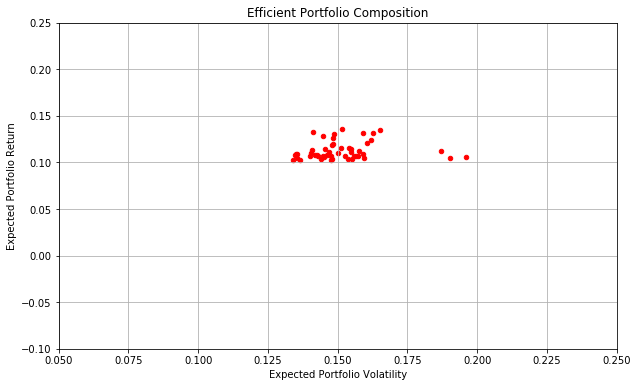

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .25)


In [ ]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .25)

In [ ]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .2)